In [13]:
import os

path = "/Users/chenshuxi/Documents/MMA/MMA fall/INSY662_Elizabeth/Final Project/traffic collision"
os.chdir(path)

In [14]:
import pandas as pd
import numpy as np

# Display all columns in the console
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [15]:
df = pd.read_excel("Init Filtered Colmns_Montreal.xlsx")
df.head()

Seq_Num    Acc_Date             Street   Near_To  Acc_Type  \
0      SPVM _ 2012 _ 1  2012/02/01         ST CHARLES      STAT      31.0   
1     SPVM _ 2012 _ 10  2012/01/03  TERR VILLE DE MTL       NaN      31.0   
2    SPVM _ 2012 _ 100  2012/02/24     JACQUES BIZARD  CHERRIER      31.0   
3   SPVM _ 2012 _ 1000  2012/10/11       BD SALABERRY       NaN      31.0   
4  SPVM _ 2012 _ 10000  2012/04/22     PL DU COMMERCE       NaN      31.0   

   Surface_Cond  Light_Cond  Environ_Type  Road_Cat  Road_Aspect  Loc_Code  \
0          16.0         1.0           1.0      21.0         11.0      33.0   
1          11.0         NaN           NaN       NaN          NaN       NaN   
2          11.0         3.0           3.0      13.0         21.0      32.0   
3          11.0         1.0           3.0      21.0         11.0      40.0   
4          12.0         1.0           3.0      21.0         11.0      40.0   

   Pos_Code  Road_Config  Work_Zone  Weather_Cond  Num_Veh_Invld  Num_Death  \
0       NaN          4.0        NaN          11.0              2          0   
1       NaN          NaN        NaN          11.0              2          0   
2       NaN          1.0        NaN          11.0              2          0   
3       NaN          2.0        NaN          11.0              2          0   
4       NaN          NaN        NaN          12.0              2          0   

   Num_Serious_Inj  Num_Minor_Inj           Acc_Time  Total_Victims  \
0                0              0        Non précisé              0   
1                0              0        Non précisé              0   
2                0              0  02:00:00-02:59:00              0   
3                0              0  15:00:00-15:59:00              0   
4                0              0  15:00:00-15:59:00              0   

                                    Severity  Num_Light_Veh  Num_Heavy_Truck  \
0  Property damage below reporting threshold              1                0   
1                       Property damage only              1                0   
2  Property damage below reporting threshold              2                0   
3                       Property damage only              2                0   
4  Property damage below reporting threshold              1                0   

   Num_Equip  Num_Bus  Num_Bike  Num_Moped  Num_Moto  Num_Taxi  Num_Emerg  \
0          0        0         0          0         0         0          0   
1          0        0         0          0         0         0          0   
2          0        0         0          0         0         0          0   
3          0        0         0          0         0         0          0   
4          0        0         0          0         0         0          0   

   Num_Snowmobile  Num_OffRoad  Num_Other_Veh  Num_Unspec_Veh  Num_Ped_Death  \
0               0            0              0               1              0   
1               0            0              0               1              0   
2               0            0              0               0              0   
3               0            0              0               0              0   
4               0            0              0               1              0   

   Num_Ped_Inj  Num_Ped_Vic  Num_Moto_Death  Num_Moto_Inj  Num_Moto_Vic  \
0            0            0               0             0             0   
1            0            0               0             0             0   
2            0            0               0             0             0   
3            0            0               0             0             0   
4            0            0               0             0             0   

   Num_Bike_Death  Num_Bike_Inj  Num_Bike_Vic  Speed_Limit Loc_Quality  \
0               0             0             0          NaN           A   
1               0             0             0          NaN           B   
2               0             0             0         50.0           A   
3        

##### Check duplicate

In [16]:
print(df.shape)
# Check for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates) > 0)

(218128, 50)
False


##### Missing values

In [17]:
mis_col_dict = []
for col in df.columns:
    if df[col].isnull().any():
        mis_col_dict.append({
            "feature" : col, 
            "NA_count": df[col].isnull().sum(), 
            "missing %": np.round((df[col].isnull().sum()*100) / len(df), 2)
        })

missing_df = pd.DataFrame(mis_col_dict)
missing_df

feature  NA_count  missing %
0         Street     12264       5.62
1        Near_To     71031      32.56
2       Acc_Type     10054       4.61
3   Surface_Cond     12746       5.84
4     Light_Cond     12909       5.92
5   Environ_Type      7044       3.23
6       Road_Cat      6344       2.91
7    Road_Aspect      9903       4.54
8       Loc_Code     17743       8.13
9       Pos_Code    168943      77.45
10   Road_Config     21947      10.06
11     Work_Zone    213230      97.75
12  Weather_Cond     13589       6.23
13   Speed_Limit     80812      37.05
14     Lontitude         7       0.00
15      Latitude         7       0.00

Drop features with >50% missing values: Part_Sit, Road_Cond, Pos_Code, Work_Zone

In [18]:
dropped_cols = missing_df.loc[missing_df["missing %"] > 50, "feature"].tolist()
df.drop(dropped_cols, axis = 1, inplace = True)

Variables need impution

In [19]:
imp_cols = missing_df.loc[missing_df["missing %"] < 50, "feature"].tolist()
imp_cols

['Street',
 'Near_To',
 'Acc_Type',
 'Surface_Cond',
 'Light_Cond',
 'Environ_Type',
 'Road_Cat',
 'Road_Aspect',
 'Loc_Code',
 'Road_Config',
 'Weather_Cond',
 'Speed_Limit',
 'Lontitude',
 'Latitude']

##### Understand the distribution and characteristics of the variables

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218128 entries, 0 to 218127
Data columns (total 48 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Seq_Num          218128 non-null  object 
 1   Acc_Date         218128 non-null  object 
 2   Street           205864 non-null  object 
 3   Near_To          147097 non-null  object 
 4   Acc_Type         208074 non-null  float64
 5   Surface_Cond     205382 non-null  float64
 6   Light_Cond       205219 non-null  float64
 7   Environ_Type     211084 non-null  float64
 8   Road_Cat         211784 non-null  float64
 9   Road_Aspect      208225 non-null  float64
 10  Loc_Code         200385 non-null  float64
 11  Road_Config      196181 non-null  float64
 12  Weather_Cond     204539 non-null  float64
 13  Num_Veh_Invld    218128 non-null  int64  
 14  Num_Death        218128 non-null  int64  
 15  Num_Serious_Inj  218128 non-null  int64  
 16  Num_Minor_Inj    218128 non-null  int6

##### Distribution and characteristics of the variables

In [21]:
df.describe()

Acc_Type   Surface_Cond     Light_Cond   Environ_Type  \
count  208074.000000  205382.000000  205219.000000  211084.000000   
mean       33.668450      12.346598       1.607522       2.657601   
std         9.398566       5.484986       0.900421       0.936559   
min        31.000000      11.000000       1.000000       1.000000   
25%        31.000000      11.000000       1.000000       2.000000   
50%        31.000000      11.000000       1.000000       3.000000   
75%        31.000000      12.000000       3.000000       3.000000   
max        99.000000      99.000000       4.000000       9.000000   

            Road_Cat    Road_Aspect       Loc_Code    Road_Config  \
count  211784.000000  208225.000000  200385.000000  196181.000000   
mean       14.484173      11.396072      38.815775       2.676156   
std         2.927533       1.734314      18.408337       1.955614   
min        11.000000      11.000000       0.000000       1.000000   
25%        13.000000      11.000000      32.000000       1.000000   
50%        13.000000      11.000000      33.000000       2.000000   
75%        14.000000      11.000000      34.000000       3.000000   
max        29.000000      24.000000      99.000000       9.000000   

        Weather_Cond  Num_Veh_Invld      Num_Death  Num_Serious_Inj  \
count  204539.000000  218128.000000  218128.000000    218128.000000   
mean       12.321063       1.950057       0.001233         0.008926   
std         6.800747       0.584206       0.035871         0.102454   
min        11.000000       1.000000       0.000000         0.000000   
25%        11.000000       2.000000       0.000000         0.000000   
50%        11.000000       2.000000       0.000000         0.000000   
75%        12.000000       2.000000       0.000000         0.000000   
max        99.000000      31.000000       2.000000         6.000000   

       Num_Minor_Inj  Total_Victims  Num_Light_Veh  Num_Heavy_Truck  \
count  218128.000000  218128.000000  218128.000000    218128.000000   
mean        0.260035       0.270195       1.486013         0.103297   
std         0.570941       0.582353       0.783895         0.316357   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000       1.000000         0.000000   
50%         0.000000       0.000000       1.000000         0.000000   
75%         0.000000       0.000000       2.000000         0.000000   
max        24.000000      27.000000      30.000000         3.000000   

           Num_Equip        Num_Bus       Num_Bike      Num_Moped  \
count  218128.000000  218128.000000  218128.000000  218128.000000   
mean        0.014464       0.025866       0.040022       0.006134   
std         0.119854       0.160886       0.197527       0.079013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         2.000000       3.000000       7.000000       2.000000   

            Num_Moto       Num_Taxi      Num_Emerg  Num_Snowmobile  \
count  218128.000000  218128.000000  218128.000000   218128.000000   
mean        0.013717       0.032999       0.033421        0.000028   
std         0.118189       0.184393       0.190024        0.005245   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000        0.000000   
50%         0.000000       0.000000       0.000000        0.000000   
75%         0.000000       0.000000       0.000000        0.000000   
max         3.000000       7.000000       4.000000        1.000000   

         Num_OffRoad  Num_Other_Veh  Num_Unspec_Veh  Num_Ped_Death  \
count  218128.000000  218128.000000   218128.000000  218128.000000   
mean        0.000087       0.005501        0.188509       0.000720   
std         0.009333     

- Acc_Date should be converted to datetime

In [22]:
df["Acc_Date"] = pd.to_datetime(df["Acc_Date"], format='%Y/%m/%d')

df['Weekday'] = df['Acc_Date'].dt.day_name()   
df['Month'] = df['Acc_Date'].dt.month_name()       
df['Year'] = df['Acc_Date'].dt.year           

print(df[["Acc_Date", "Weekday", "Month", "Year"]].dtypes)

Acc_Date    datetime64[ns]
Weekday             object
Month               object
Year                 int32
dtype: object


- Acc_Time should be converted from interval to numbers (0 ~ 23)

In [23]:
time_dict = {f"{str(hour).zfill(2)}:00:00-{str(hour).zfill(2)}:59:00": hour for hour in range(24)}
time_dict["Non précisé", ] = np.nan

df["Acc_Time"] = df["Acc_Time"].map(time_dict)
df["Acc_Time"].head()

0     NaN
1     NaN
2     2.0
3    15.0
4    15.0
Name: Acc_Time, dtype: float64

NA imupation

Acc_Time is part of a time series or sequence, I impute missing values based on previous, using a rolling window imputation.

For columns of a numeric type that represent categorical variables, I replace missing values with the value from the previous row. 

Why? 

Because this dataset seems like a time series or ordered datasets, it has a sequential pattern, so I assume that adjacent rows are likely to have similar or identical categorizations, whic.

In [24]:
print("# of Not specified time: ", len(df[df["Acc_Time"] == ""]))
print("-----------------------")
print(df["Acc_Time"].value_counts())
print("-----------------------")

# impute NA with mode
df["Acc_Time"].replace("", np.nan, inplace=True) # replace empty strings with NaN
df["Acc_Time"].fillna(method='ffill', inplace=True)

# backward fill to handle NaN values for first two rows
df["Acc_Time"].fillna(method='bfill', inplace=True)
df["Acc_Time"] = df["Acc_Time"].astype('Int64')

# Check the value counts
print(df["Acc_Time"].value_counts().head())

# of Not specified time:  0
-----------------------
Acc_Time
16.0    15594
15.0    15157
17.0    14648
14.0    13243
13.0    12231
12.0    12108
8.0     11607
18.0    11017
11.0    10870
10.0    10383
9.0     10215
19.0     8402
7.0      8245
20.0     7281
21.0     6805
22.0     5854
23.0     5191
0.0      4238
6.0      4125
3.0      3572
1.0      2932
2.0      2685
4.0      2251
5.0      2246
Name: count, dtype: int64
-----------------------
Acc_Time
16    16823
15    16337
17    15829
14    14428
13    13318
Name: count, dtype: Int64


/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/3256454990.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Acc_Time"].replace("", np.nan, inplace=True) # replace empty strings with NaN
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/3256454990.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

##### One by one variable distribution and fixing

Target variable: Severity

/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/429158471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages, y=severity_counts.index, palette="viridis")


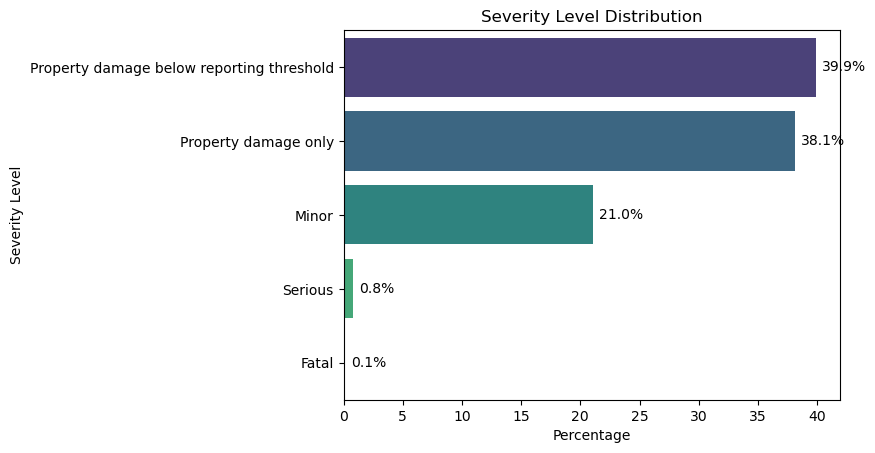

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

severity_counts = df['Severity'].value_counts()
percentages = (severity_counts / severity_counts.sum()) * 100

sns.barplot(x=percentages, y=severity_counts.index, palette="viridis")

for i, percentage in enumerate(percentages):
    plt.text(x=percentage + 0.5, y=i, s=f'{percentage:.1f}%', va='center')

plt.xlabel('Percentage')
plt.ylabel('Severity Level')
plt.title('Severity Level Distribution')

plt.show()

Data imbalance issues related to the Severity attribute. 

even if certain severity levels are rare, they carry the most important info for understanding the risk factors associated with them. collapsing rare levels into one group can be a useful technique for improving model performance in many cases, but in the context of a collision dataset where severity levels such as "serious" or "fatal" are crucial to understanding the data and the overall analysis, they are critical for predictive modeling, safety assessments, and decision-making, it may not be the best approach.

But the rarity in the data set risks the model seeing it as an outlier, which in turn biases predictions towards more common categories. 

To address this imbalance, there're two ways:

1. we can use balancing technique SMOTE to fix it.
2. we can try classification models that are specifically designed to handle imbalanced data(decision trees, RF, XGBoost...). These models can focus on learning the minority class better without needing to collapse it.

Time-related variables
1. Hourly Distribution
2. Weekly Distribution
3. Monthly Distribution
4. Yearly Distribution

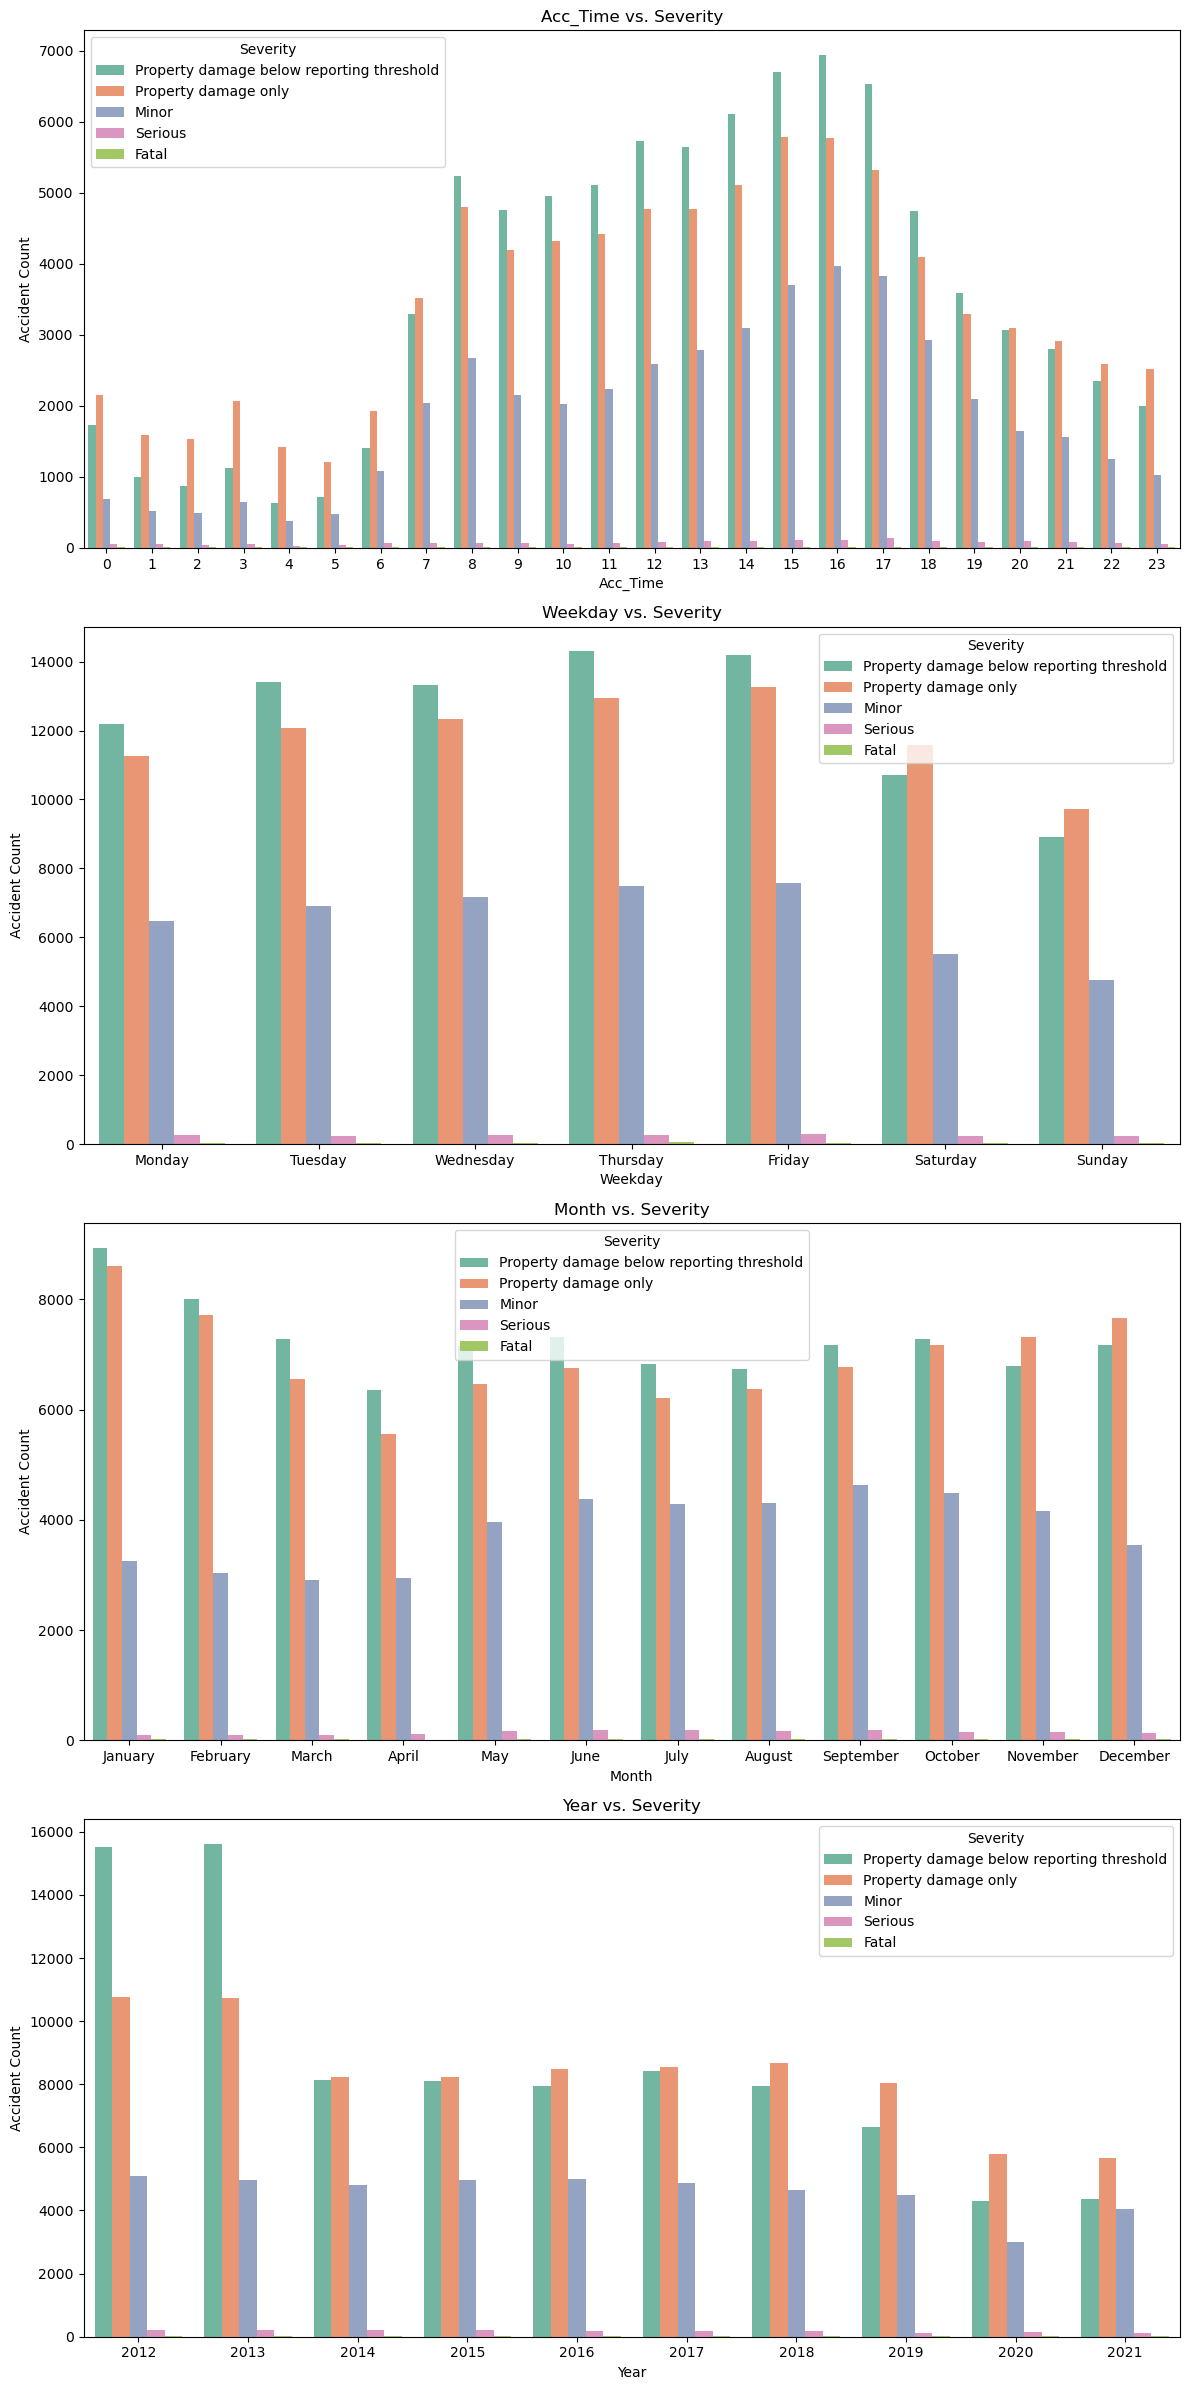

In [26]:
hour_order = list(range(24))  
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
time_cols = ["Acc_Time", "Weekday", "Month", "Year"]

fig, axes = plt.subplots(nrows=len(time_cols), ncols=1, figsize=(12, 6 * len(time_cols)))

for i, col in enumerate(time_cols):
    if col == 'Acc_Time':
        sns.countplot(x=col, hue='Severity', data=df, palette='Set2', ax=axes[i], order=hour_order)
    elif col == 'Weekday':
        sns.countplot(x=col, hue='Severity', data=df, palette='Set2', ax=axes[i], order=weekday_order)
    elif col == 'Month':
        sns.countplot(x=col, hue='Severity', data=df, palette='Set2', ax=axes[i], order=month_order)
    else:
        sns.countplot(x=col, hue='Severity', data=df, palette='Set2', ax=axes[i])

    axes[i].set_title(f'{col} vs. Severity')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Accident Count')
    axes[i].tick_params(axis='x') 

plt.tight_layout()
plt.show()

- A clear peak between 3:00 p.m. and 5:00 p.m.
  
  This increase mostly happens in categories like property damage below reporting threshold, property damage only, and minor accidents—probably due to the evening rush hour when traffic is heaviest. Serious accidents show a similar rise during this time, but fatal accidents don’t really follow a clear pattern throughout the day. This could mean that fatal accidents are more influenced by factors other than just traffic volume, like impaired driving.

- Accidents occur most frequently during the week and peak on Friday. 
  
  Fridays tend to see a bump as people head home from work and start their weekend plans, likely affecting traffic flow and driving habits.

- A seasonal pattern during a year.

  We see a peak in accidents in the winter months of January and February, and again in summer during June and July. The winter peak is likely due to challenging weather conditions, while the summer increase could be tied to higher travel rates. December also stands out with more accidents, probably because of the holiday travel rush around Christmas and New Year.

- Historical trends
  
  Back in 2013, the accident rate was unusually high across all categories, especially for property damage incidents. Since 2014, tho, the number of accidents has generally been declining with a few small fluctuations. There was a slight uptick in 2018 and 2019, but numbers fell sharply in 2020. Overall, Montreal’s seeing a positive trend in reduced accidents, which might reflect better road safety measures. The big drop in 2020 may also have been influenced by external factors, like policy changes, advances in vehicle safety, or even the reduced traffic from the COVID-19 pandemic.

Frequency data (Discrete numerical variables)

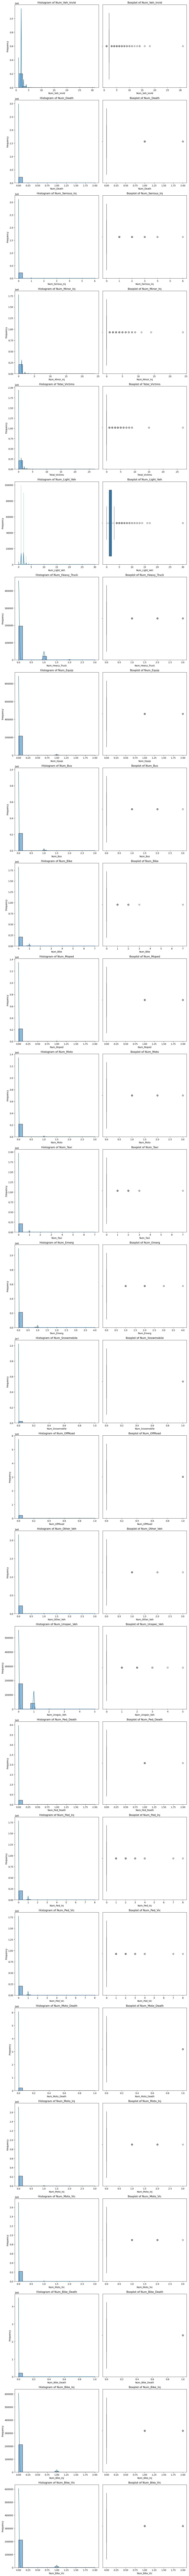

In [27]:
num_columns = [col for col in df.columns if col.startswith('Num') or col.startswith('Total')]

fig, axes = plt.subplots(nrows=len(num_columns), ncols=2, figsize=(12, 6 * len(num_columns)))

for i, col in enumerate(num_columns):
    # histogram
    sns.histplot(df[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # box plot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

In [28]:
zero_percentage = {}
for col in num_columns:
    zero_count = (df[col] == 0).sum()  
    total_count = df[col].shape[0]  
    zero_percentage[col] = (zero_count / total_count) * 100  

zero_percentage_df = pd.DataFrame(list(zero_percentage.items()), columns=['Column', 'Zero_Percentage'])
zero_percentage_df

Column  Zero_Percentage
0     Num_Veh_Invld         0.000000
1         Num_Death        99.879429
2   Num_Serious_Inj        99.172504
3     Num_Minor_Inj        78.815191
4     Total_Victims        78.020245
5     Num_Light_Veh         7.038986
6   Num_Heavy_Truck        90.037501
7         Num_Equip        98.559103
8           Num_Bus        97.447370
9          Num_Bike        96.020227
10        Num_Moped        99.393934
11         Num_Moto        98.648958
12         Num_Taxi        96.796376
13        Num_Emerg        96.845889
14   Num_Snowmobile        99.997249
15      Num_OffRoad        99.991290
16    Num_Other_Veh        99.452615
17   Num_Unspec_Veh        81.250458
18    Num_Ped_Death        99.928482
19      Num_Ped_Inj        95.154221
20      Num_Ped_Vic        95.086371
21   Num_Moto_Death        99.992206
22     Num_Moto_Inj        99.243563
23     Num_Moto_Vic        99.235770
24   Num_Bike_Death        99.985788
25     Num_Bike_Inj        97.012763
26     Num_Bike_Vic        96.998551

Given that nearly all of these discrete numerical predictors represent count data with a significant number of zeros, where each zero carries meaningful information, we converted them into binary variables. This transformation indicates whether the associated item (e.g., number of vehicles, bikes, etc.) was involved in the collision, rather than treating the original counts as numerical values.

(Note: Using transformations like log or inverse would hinder interpretability, which is crucial for us, as our primary goal is to identify the most critical combination of factors influencing collision severity for government use. Maintaining interpretability allows us to provide clearer insights for policy and decision-making.)

This method is straightforward and interpretable, especially for highly zero-inflated count predictors. By indicating the presence or absence of a count, we simplify the information for the classifier and allow it to capture meaningful distinctions without overcomplicating the model.
(Often used in classification tasks with sparse data, where zero counts are common e.g., in healthcare, fraud detection)

Use Count Models to create new features:

- Hurdle Models or Zero-Inflated Models: These can be used to pre-process the count predictors by capturing the zero-inflation and non-zero distributions separately. We can create two new features:
- A binary feature indicating whether the value is zero or non-zero.
- A transformed count for the non-zero values (using Poisson distribution or Negative Binomial distribution, check whether the mean and variance are equal.)
  
  - zero-inflated model: differentiates the zeros into two groups is that excessive zeros are often due to the existence of a subpopulation of subjects who are not at risk for certain outcomes during the study period.
  
  - hurdle model: assumes all zero data are from one “structural” source with one part of the model being a binary model for modeling whether the response variable is zero or positive, and another part using a truncated model, such as a truncated Poisson or a truncated NB distribution for the positive data.
  
  (Notes: 
  - structural zeros (excessive zeros): subjects always produce zero counts
  - sampling zeros: subjects who are exposed to the outcome but did not or did not report the experience of the outcome during the study period)

In [29]:
# exclude Num_Veh_Invld and Total_Victims are important variables, the remaning variables need to be converted into binary
# Num_Death, Num_Serious_Inj, Num_Minor_Inj should also be removed since they will become "binary severity"
# all Num variables associated with viehcle injuries / death become redundant since Vehicle counts binary has covered them
excluded_cols = ["Num_Veh_Invld", "Total_Victims", "Num_Death", "Num_Serious_Inj", "Num_Minor_Inj", "Num_Death", "Num_Serious_Inj", "Num_Minor_Inj", "Total_Victims", 
                "Num_Ped_Death", "Num_Ped_Inj", "Num_Ped_Vic", "Num_Moto_Death", "Num_Moto_Inj", "Num_Moto_Vic", "Num_Bike_Death", "Num_Bike_Inj", "Num_Bike_Vic"]
zero_cols = zero_percentage_df.loc[~zero_percentage_df["Column"].isin(excluded_cols), "Column"].tolist()

binary_df = df[df.columns.difference(excluded_cols)].copy()

for col in zero_cols:
    binary_df[col] = (df[col] > 0).astype(int)

binary_df["Num_Veh_Invld"] = df["Num_Veh_Invld"]
binary_df["Total_Victims"] = df["Total_Victims"]

binary_df.head()

Acc_Date  Acc_Time  Acc_Type  Environ_Type   Latitude  Light_Cond  \
0 2012-02-01         2      31.0           1.0  45.455505         1.0   
1 2012-01-03         2      31.0           NaN  45.486871         NaN   
2 2012-02-24         2      31.0           3.0  45.490564         3.0   
3 2012-10-11        15      31.0           3.0  45.484648         1.0   
4 2012-04-22        15      31.0           3.0  45.467136         1.0   

   Loc_Accuracy  Loc_Code Loc_Imprecise Loc_Quality  Lontitude     Month  \
0             3      33.0             N           A -73.861616  February   
1             4       NaN             N           B -73.878549   January   
2             1      32.0             O           A -73.871542  February   
3             1      40.0             N           A -73.804841   October   
4             1      40.0             N           A -73.543590     April   

    Near_To  Num_Bike  Num_Bus  Num_Emerg  Num_Equip  Num_Heavy_Truck  \
0      STAT         0        0          0          0                0   
1       NaN         0        0          0          0                0   
2  CHERRIER         0        0          0          0                0   
3       NaN         0        0          0          0                0   
4       NaN         0        0          0          0                0   

   Num_Light_Veh  Num_Moped  Num_Moto  Num_OffRoad  Num_Other_Veh  \
0              1          0         0            0              0   
1              1          0         0            0              0   
2              1          0         0            0              0   
3              1          0         0            0              0   
4              1          0         0            0              0   

   Num_Snowmobile  Num_Taxi  Num_Unspec_Veh  Road_Aspect  Road_Cat  \
0               0         0               1         11.0      21.0   
1               0         0               1          NaN       NaN   
2               0         0               0         21.0      13.0   
3               0         0               0         11.0      21.0   
4               0         0               1         11.0      21.0   

   Road_Config              Seq_Num  \
0          4.0      SPVM _ 2012 _ 1   
1          NaN     SPVM _ 2012 _ 10   
2          1.0    SPVM _ 2012 _ 100   
3          2.0   SPVM _ 2012 _ 1000   
4          NaN  SPVM _ 2012 _ 10000   

                                    Severity  Speed_Limit             Street  \
0  Property damage below reporting threshold          NaN         ST CHARLES   
1                       Property damage only          NaN  TERR VILLE DE MTL   
2  Property damage below reporting threshold         50.0     JACQUES BIZARD   
3                       Property damage only          NaN       BD SALABERRY   
4  Property damage below reporting threshold          NaN     PL DU COMMERCE   

   Surface_Cond  Weather_Cond    Weekday  Year  Num_Veh_Invld  Total_Victims  
0          16.0          11.0  Wednesday  2012              2              0  
1          11.0          11.0    Tuesday  2012              2              0  
2          11.0          11.0     Friday  2012              2              0  
3          11.0          11.0   Thursday  2012              2              0  
4          12.0          12.0     Sunday  2012              2              0

In [30]:
new_num_columns = [col for col in binary_df.columns if col.startswith('Num') or col.startswith('Total')]
severity_counts = binary_df[new_num_columns + ["Severity"]].groupby("Severity").sum()
severity_counts

Num_Bike  Num_Bus  Num_Emerg  \
Severity                                                                  
Fatal                                            31       16          3   
Minor                                          6285     1857        500   
Property damage below reporting threshold      1829     1888       4753   
Property damage only                            257     1725       1605   
Serious                                         279       82         19   

                                           Num_Equip  Num_Heavy_Truck  \
Severity                                                                
Fatal                                              5               56   
Minor                                            266             2169   
Property damage below reporting threshold       1415             8182   
Property damage only                            1441            11194   
Serious                                           16              130   

                                           Num_Light_Veh  Num_Moped  Num_Moto  \
Severity                                                                        
Fatal                                                187          1        17   
Minor                                              41966        696      1573   
Property damage below reporting threshold          80170        493       770   
Property damage only                               78931        100       456   
Serious                                             1520         32       131   

                                           Num_OffRoad  Num_Other_Veh  \
Severity                                                                
Fatal                                                0              1   
Minor                                                5             63   
Property damage below reporting threshold            7            661   
Property damage only                                 6            467   
Serious                                              1              2   

                                           Num_Snowmobile  Num_Taxi  \
Severity                                                              
Fatal                                                   0        10   
Minor                                                   1      2166   
Property damage below reporting threshold               3      2076   
Property damage only                                    2      2651   
Serious                                                 0        85   

                                           Num_Unspec_Veh  Num_Veh_Invld  \
Severity                                                                   
Fatal                                                   4            383   
Minor                                                 709          84938   
Property damage below reporting threshold           26239         166422   
Property damage only                                13914         170718   
Serious                                                32           2901   

                                           Total_Victims  
Severity                                                  
Fatal                                                340  
Minor                                              56205  
Property damage below reporting threshold              0  
Property damage only                                   0  
Serious                                             2392

/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/1932807899.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/1932807899.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/1932807899.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/1932807899.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/1932807899.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000g

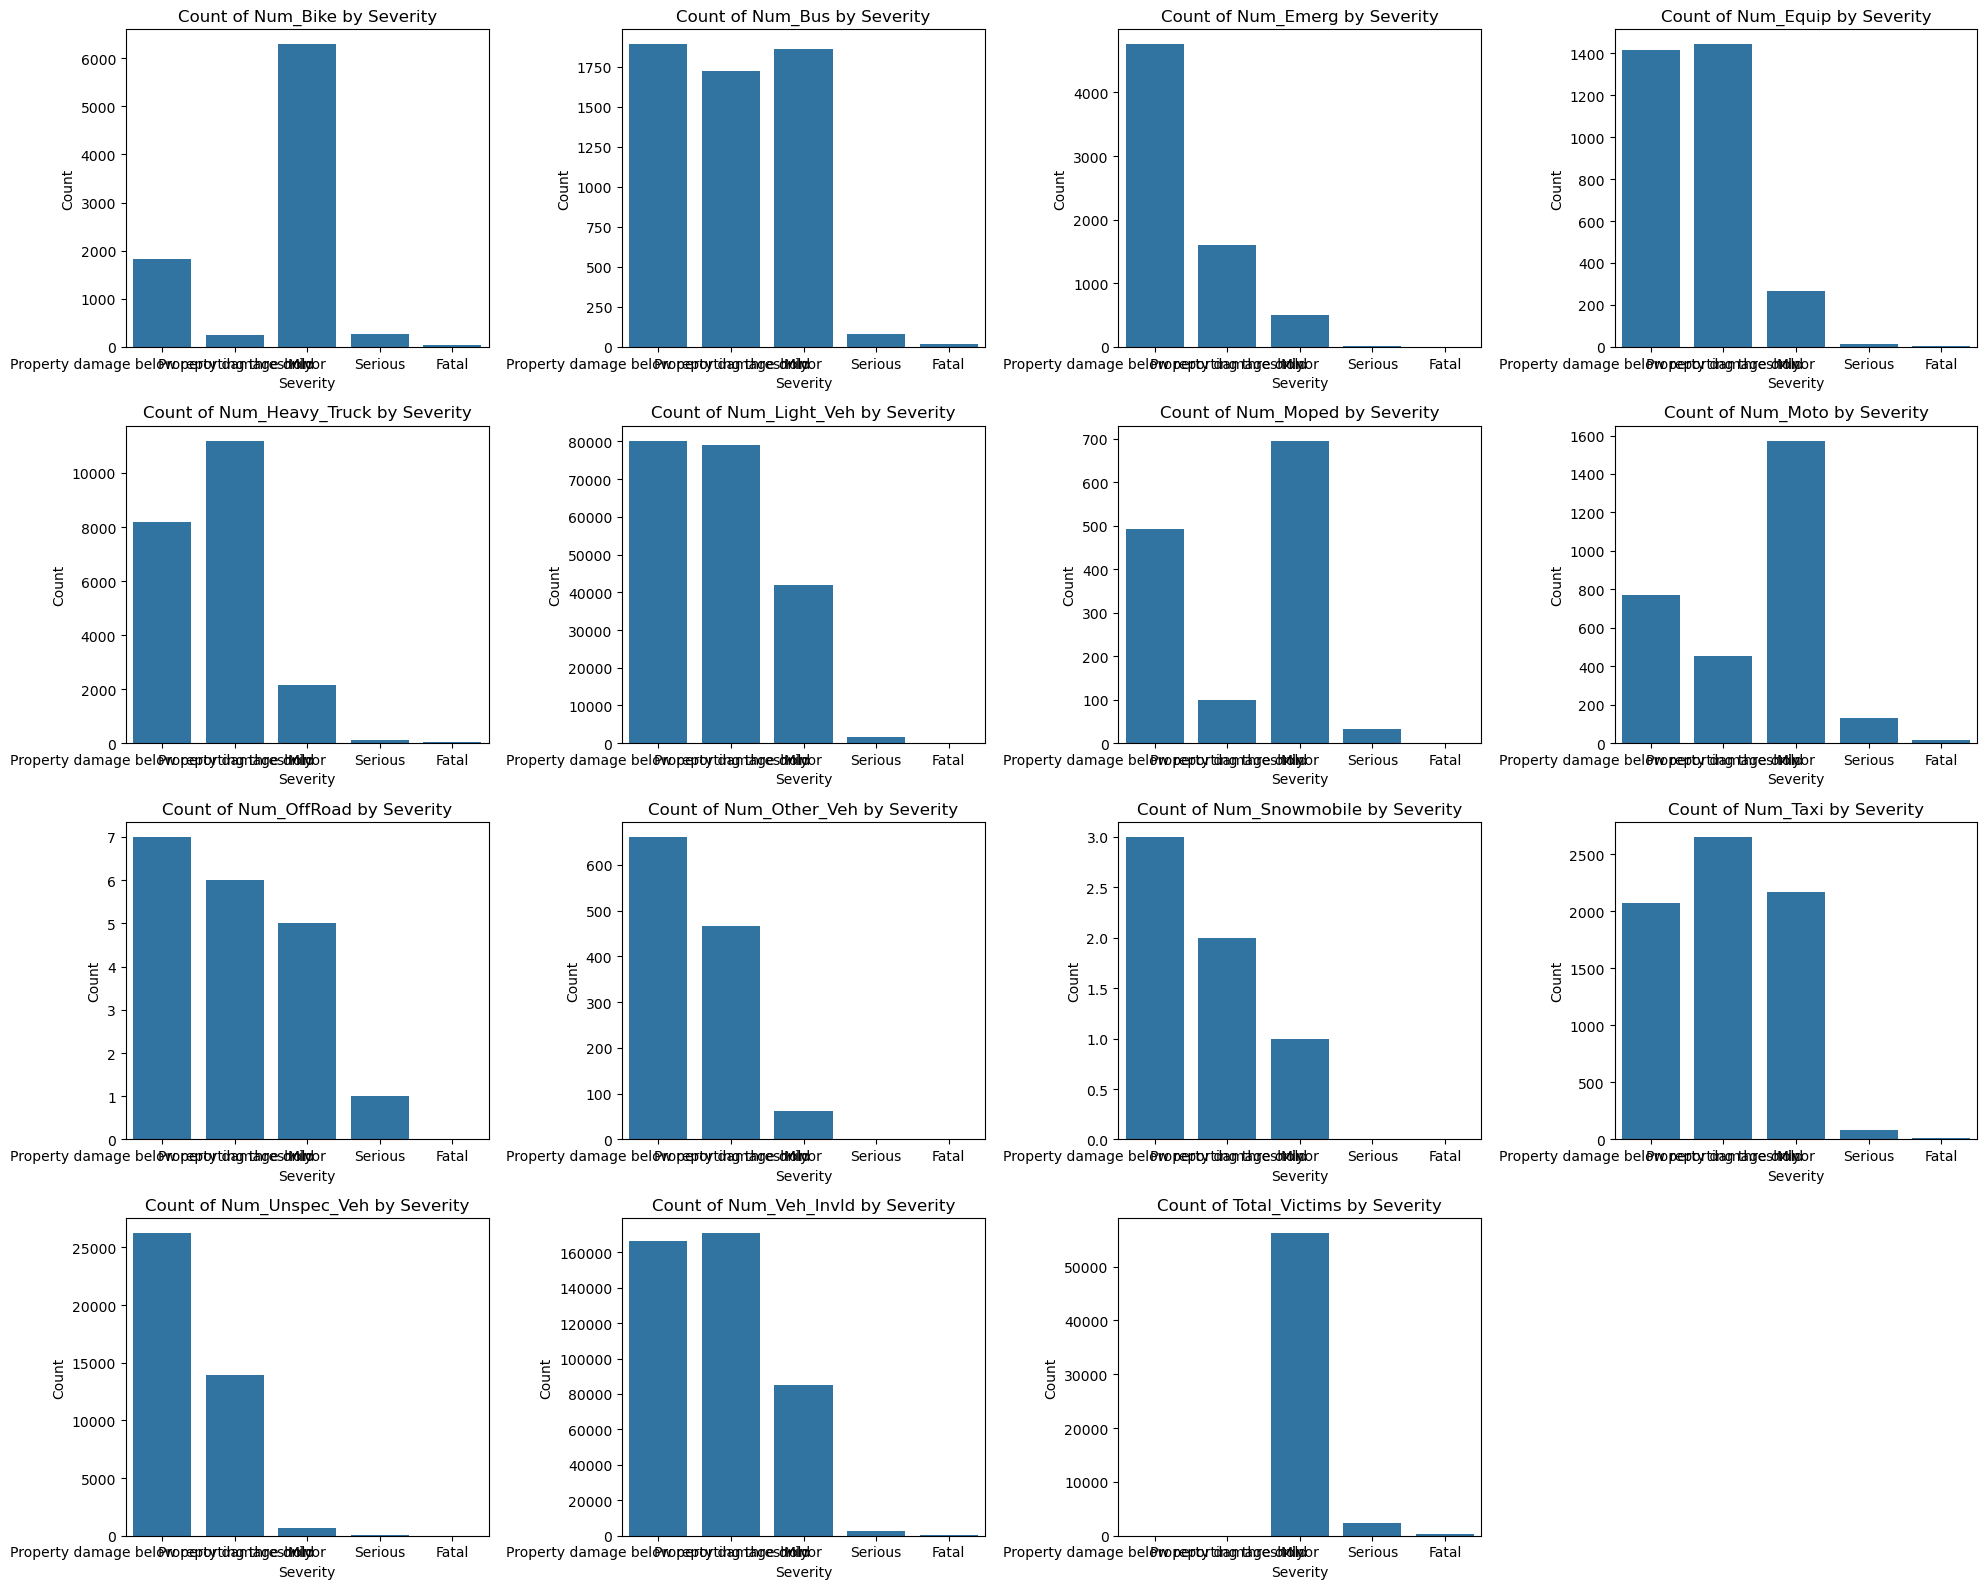

In [31]:
import math

cols = 4
rows = math.ceil(len(new_num_columns) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(new_num_columns):
    sns.barplot(
        data=binary_df, 
        x="Severity", 
        y=col, 
        estimator=sum, 
        ci=None, 
        
        ax=axes[i]
    )

    axes[i].set_title(f'Count of {col} by Severity')
    axes[i].set_xlabel('Severity')
    axes[i].set_ylabel('Count')
    
for i in range(len(new_num_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

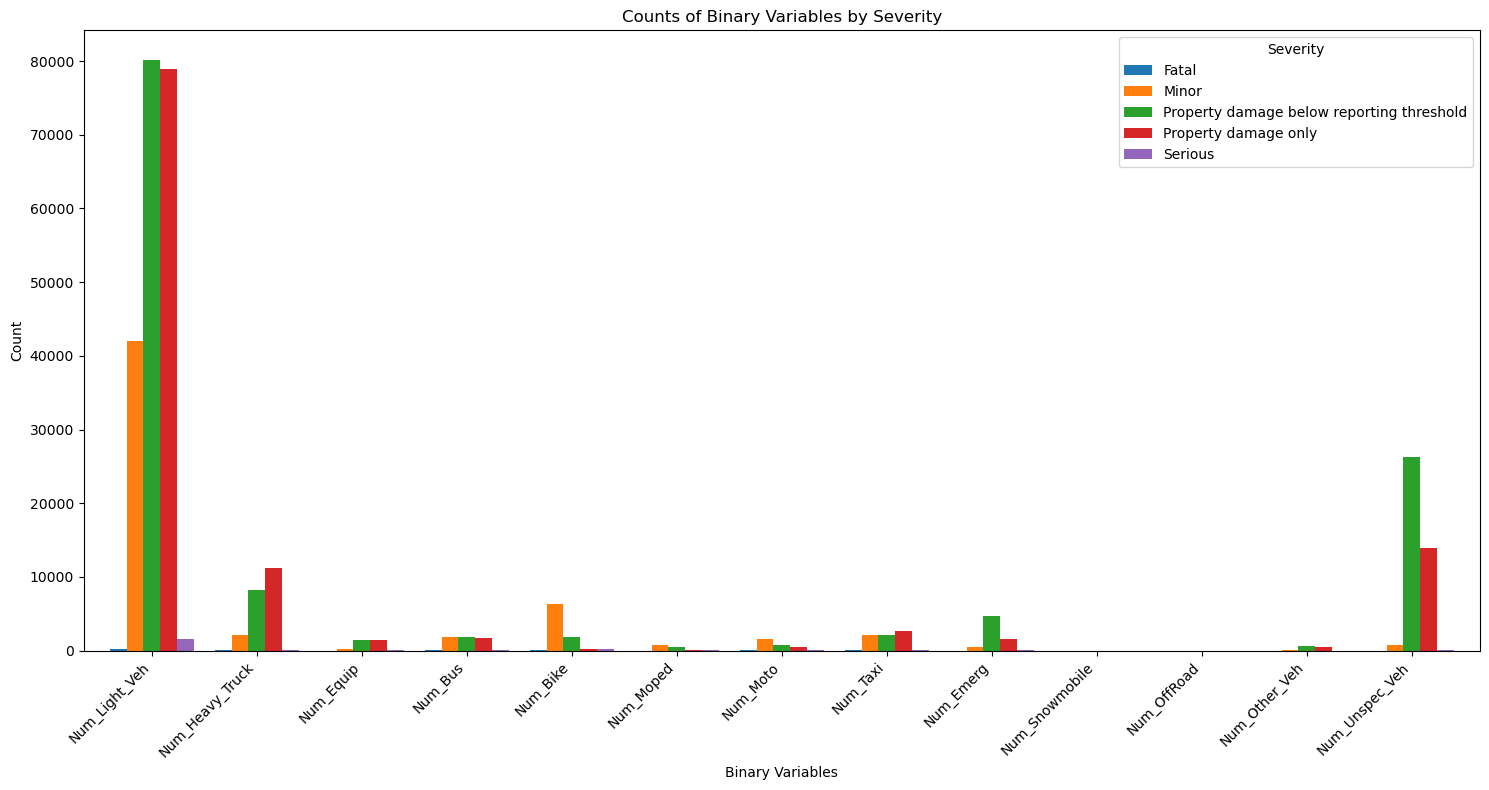

In [32]:
severity_counts = binary_df.groupby("Severity")[zero_cols].sum().T
severity_counts.plot(kind="bar", figsize=(15, 8), width=0.8)

plt.title("Counts of Binary Variables by Severity")
plt.xlabel("Binary Variables")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  
plt.legend(title="Severity", loc="upper right")

plt.tight_layout()
plt.show()

Exclude Num_Light_Veh, Num_Unspec_Veh for better a view at other binaries

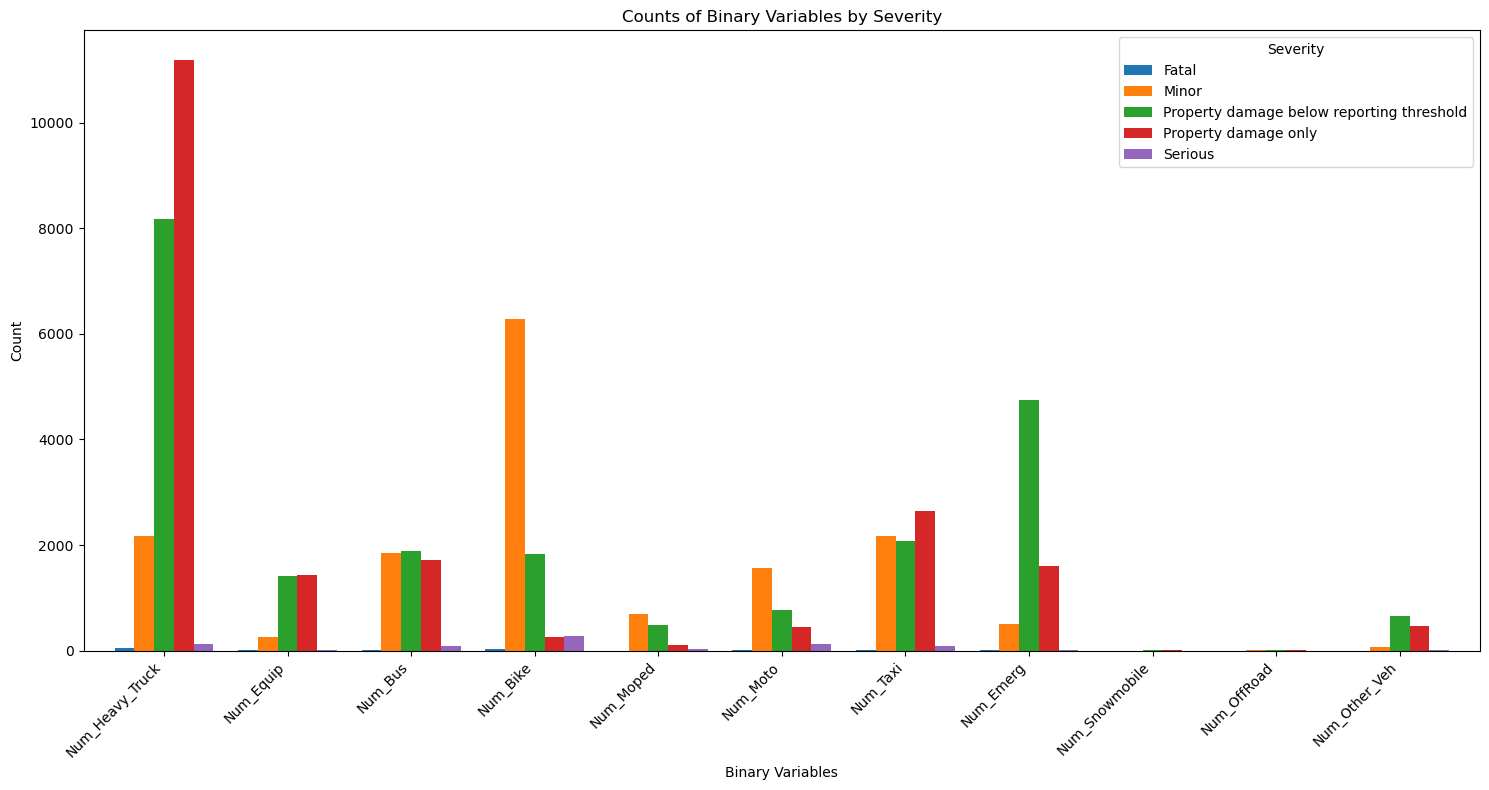

In [33]:
zero_cols_excld = [col for col in zero_cols if col != 'Num_Light_Veh' and col != 'Num_Unspec_Veh']

severity_counts = binary_df.groupby("Severity")[zero_cols_excld].sum().T

severity_counts.plot(kind="bar", figsize=(15, 8), width=0.8)

plt.title("Counts of Binary Variables by Severity")
plt.xlabel("Binary Variables")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right") 
plt.legend(title="Severity", loc="upper right")

plt.tight_layout()
plt.show()

- Light Vehicles: Most common vehicle type, be the strongest predictor for serious/fatal outcomes
- Heavy Trucks: The second key predictor for serious/fatal outcomes despite lower absolute numbers, showing the highest proportion of severe accidents - relative to total incidents.
- Motorcycles: Similar to Heavy Trucks, showing a high proportion of serious/fatal accidents relative to total counts, despite having fewer overall incidents than many other vehicle types.
- Bicycles: Follow motocycles, demonstrating significant serious/fatal incidents relative to their total count.
- Taxi: Shows a moderate number of total incidents, with a small but notable proportion of serious/fatal outcomes.
- Bus: Has a balanced distribution across different severity levels, and shows lower proportions of fatal accidents.
- Emergency Vehicles: Despite operating in high-stress situations and high speeds, they show relatively low fatal/serious accident rates (likely due to specialized driver training and other vehicles yielding right of way).
- Equipment, Off-road vehicles, Other vehicles: Shows relatively low incident numbers overall with primarily property damage outcomes, making them less significant predictors of serious/fatal accidents.

##### Missing values handling

Initially, I tried KNN for imputing missing values in the Street variable, because it's categorical, and KNN can work well with categorical data, especially if the dataset has other relevant features (like proximity to other locations or features that might influence the street of the accident). These features correlate with the street location.
so I thought KNN can be a very robust candidate in predicting missing street values. 

But!!! it's way too computationally intensive, such that 40 mins later (after brushing my teeeth and taking a bath), it's still running and showed no sign to stop. 

I'm done.

In [34]:
for col in imp_cols:
    binary_df[col] = binary_df[col].ffill().bfill()

for col in imp_cols:
    print(f"Number of missing values in {col} after imputation:", binary_df[col].isna().sum())

Number of missing values in Street after imputation: 0
Number of missing values in Near_To after imputation: 0
Number of missing values in Acc_Type after imputation: 0
Number of missing values in Surface_Cond after imputation: 0
Number of missing values in Light_Cond after imputation: 0
Number of missing values in Environ_Type after imputation: 0
Number of missing values in Road_Cat after imputation: 0
Number of missing values in Road_Aspect after imputation: 0
Number of missing values in Loc_Code after imputation: 0
Number of missing values in Road_Config after imputation: 0
Number of missing values in Weather_Cond after imputation: 0
Number of missing values in Speed_Limit after imputation: 0
Number of missing values in Lontitude after imputation: 0
Number of missing values in Latitude after imputation: 0


##### Categorical Data

Top 20 street

/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/1863338866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_streets.index, y=top_20_streets.values, palette="viridis")


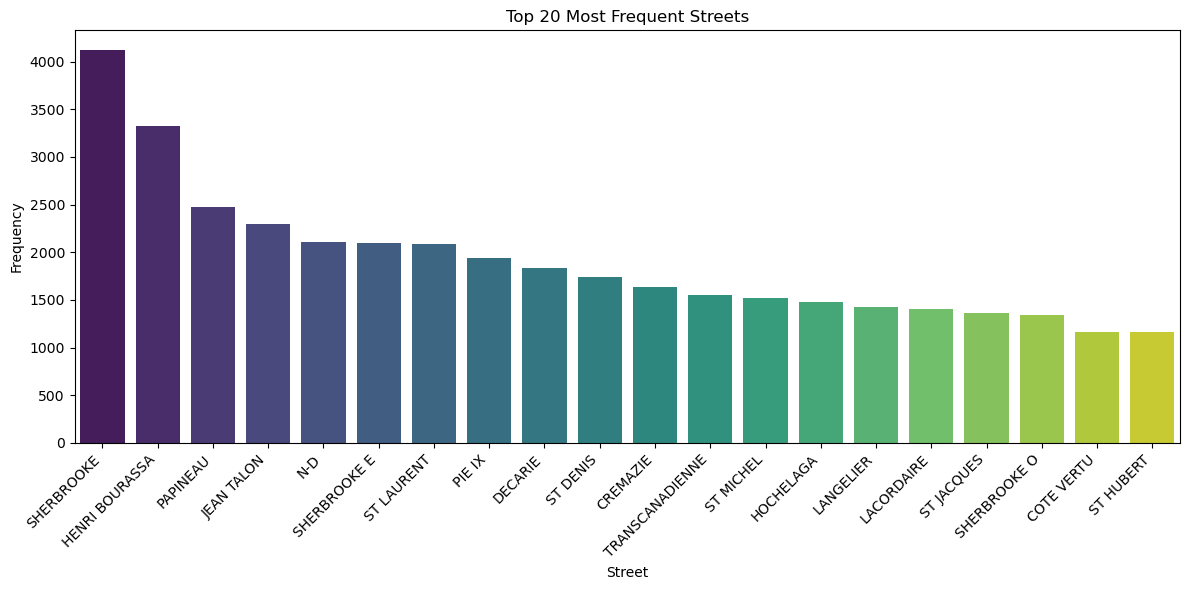

In [35]:
top_20_streets = binary_df['Street'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_streets.index, y=top_20_streets.values, palette="viridis")

plt.title('Top 20 Most Frequent Streets')
plt.xlabel('Street')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

Top 20 Near_To

/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_81339/122408310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_streets.index, y=top_20_streets.values, palette="viridis")


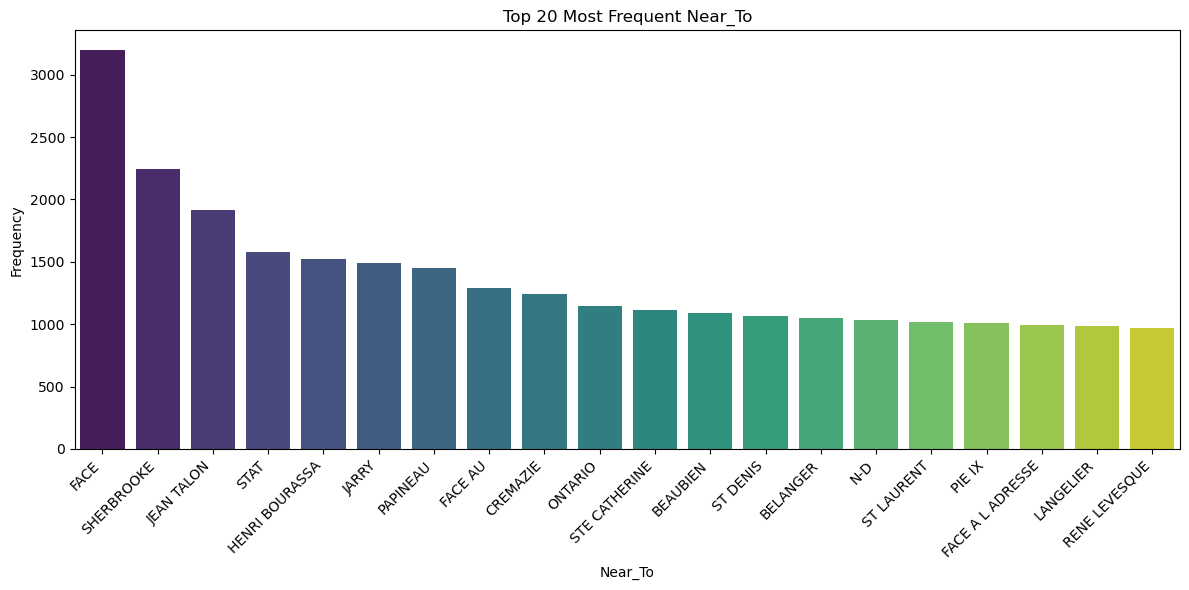

In [36]:
top_20_streets = binary_df['Near_To'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_streets.index, y=top_20_streets.values, palette="viridis")

plt.title('Top 20 Most Frequent Near_To')
plt.xlabel('Near_To')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

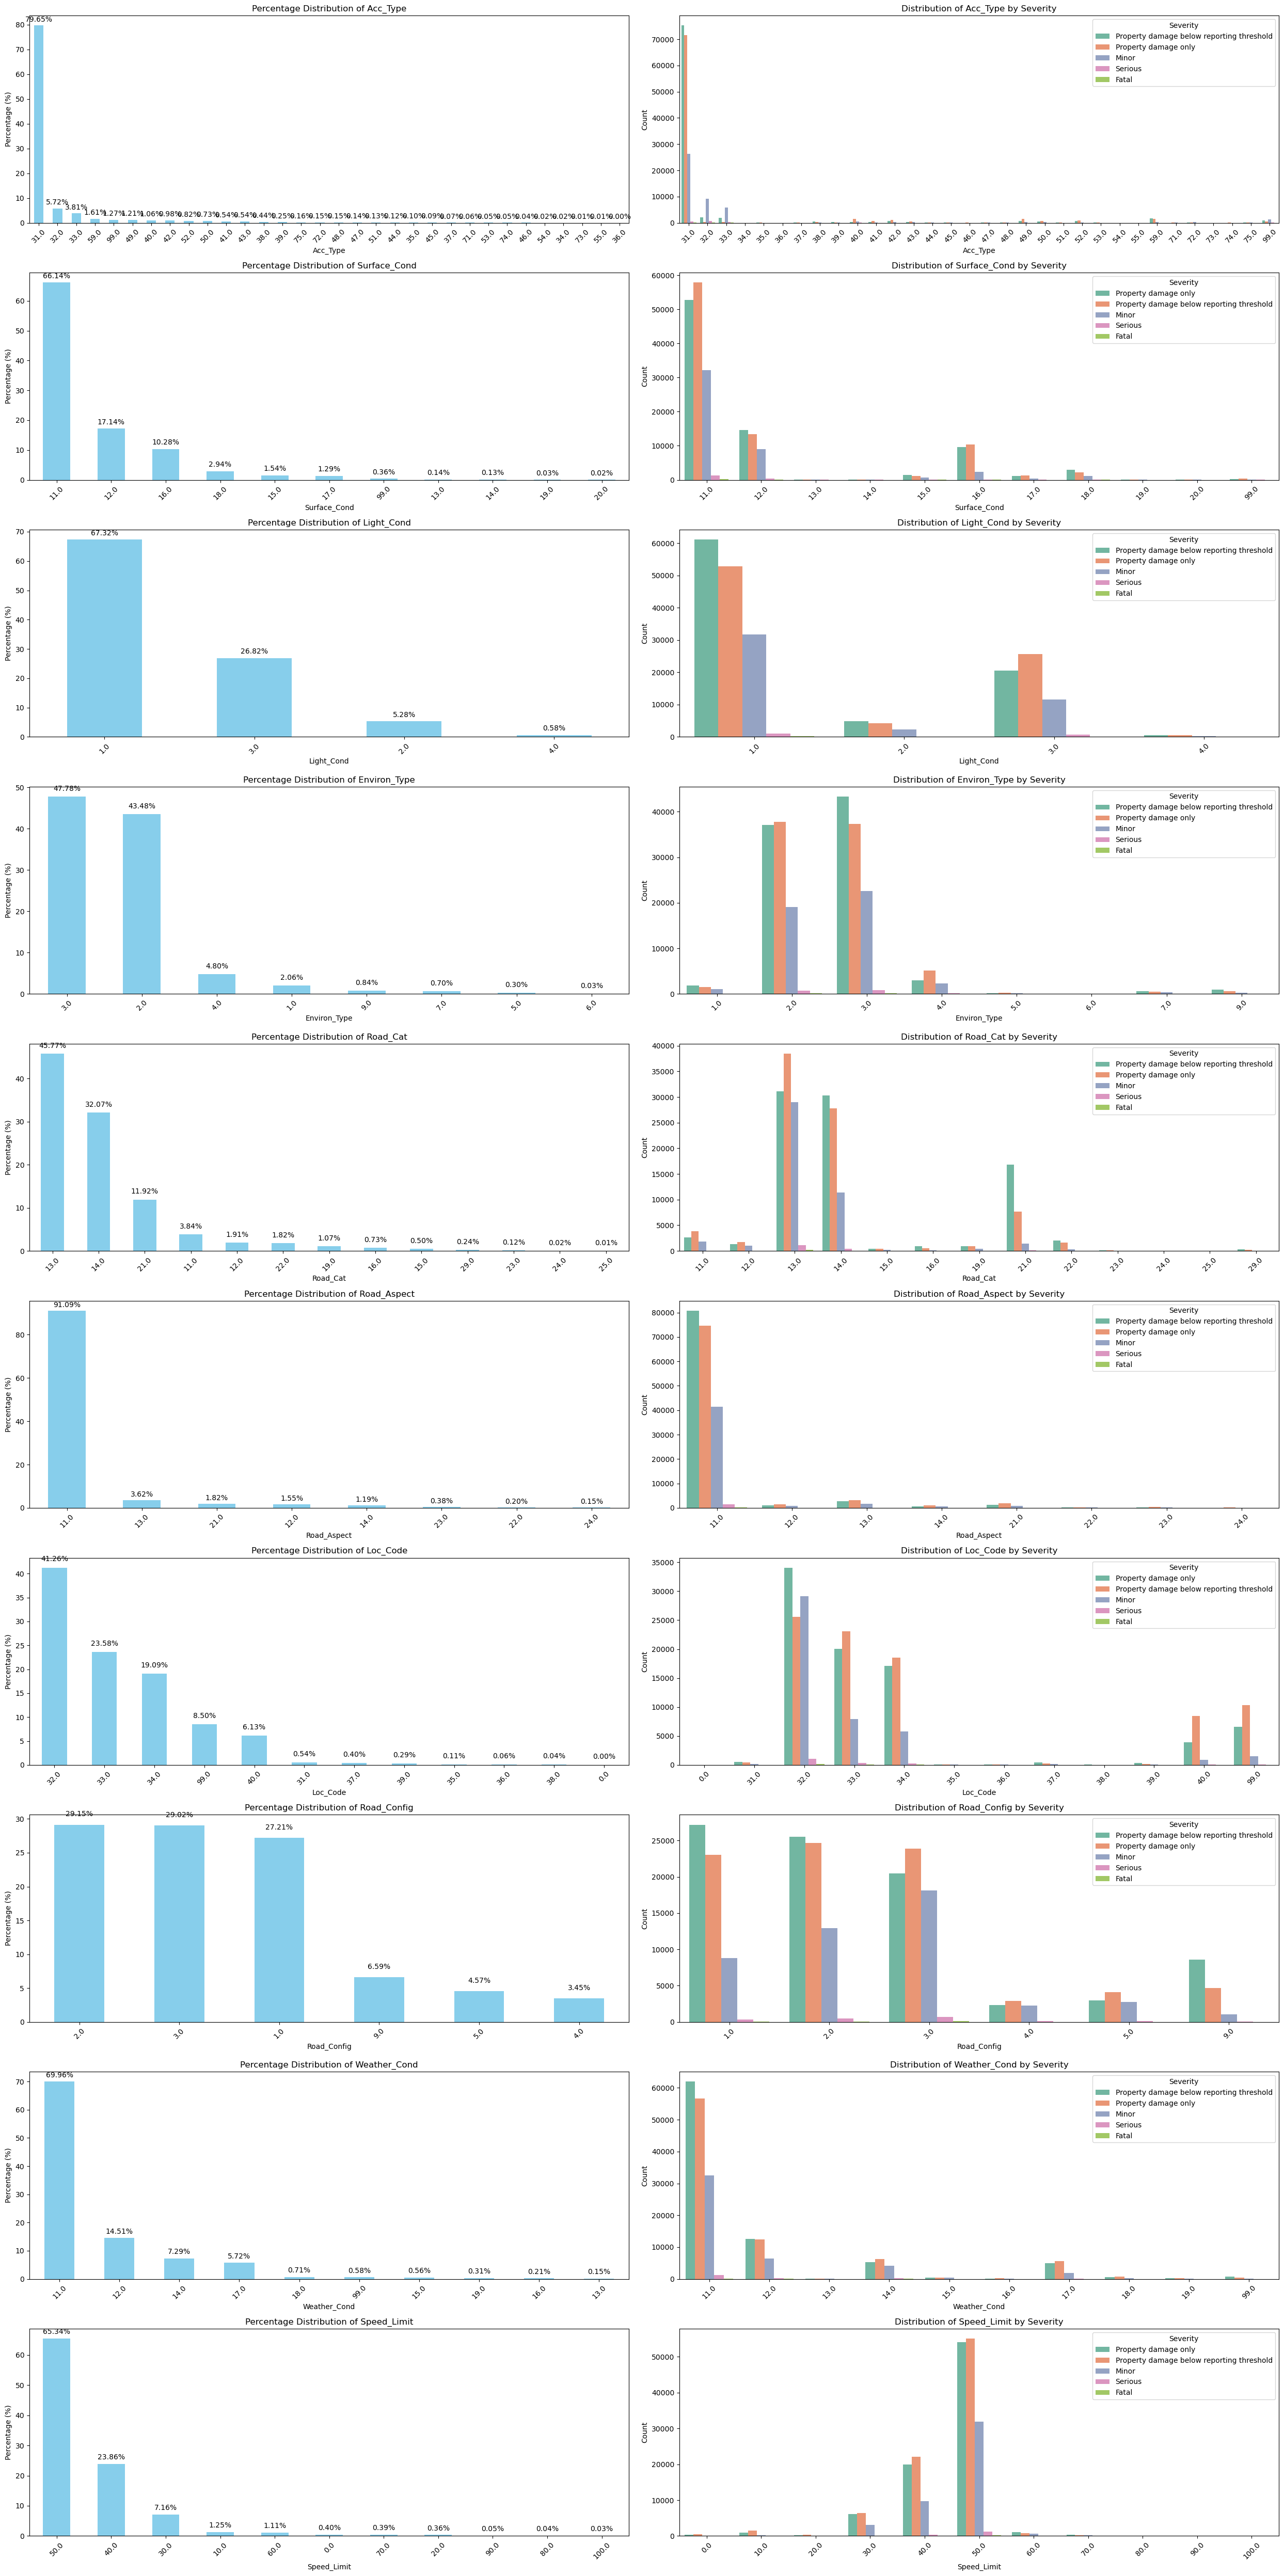

In [37]:
Cat_lst = ['Acc_Type','Surface_Cond','Light_Cond','Environ_Type','Road_Cat','Road_Aspect','Loc_Code','Road_Config', 'Weather_Cond','Speed_Limit']

rows = len(Cat_lst)
cols = 2  

plt.figure(figsize=(25, 5 * rows))  

for idx, col in enumerate(Cat_lst):
    plt.subplot(rows, cols, 2*idx + 1)  
    value_counts = binary_df[col].value_counts(normalize=True) * 100
    value_counts.plot(kind='bar', color='skyblue')

    plt.title(f'Percentage Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)

    for i, v in enumerate(value_counts):
        plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)
    
    plt.subplot(rows, cols, 2*idx + 2) 
    sns.countplot(x=col, hue='Severity', data=binary_df, palette='Set2')
    plt.title(f'Distribution of {col} by Severity')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()
plt.show()

Here we face another problem regarding the severity. certain rare categories within the categorical variables (e.g., Road_Aspect, Surface_Cond, Weather_Cond, etc.) are strongly associated with severe or fatal accidents, so collapsing them into an "other" group will risk losing important information.

Instead, we have to retain those rarer categories while still ensuring that they do not overwhelm the model.

binary encoding for categorical variables will create too many columns, definitely not a wise choise.

So I'm thinking two approaches

1. Using models such as Random Forests, which can handle categorical variables with many levels better than traditional models (e.g., logistic regression). They don't require dummy variables but can process categorical variables directly by learning how different levels of the categories interact with the target variable.

2. Target Encoding
   Instead of one-hot encoding, we could replace each category with the mean of the target variable (Severity in our case).
   
   What do I mean by target encoding?

   In target encoding, replace each category in a categorical variable with the mean of the target variable for that category. 

   1. assign weights to 5 severity levels (1 ~ 5)
   2. grouby those categories, and calculate the average Severity score for each levels in that categorical variable.
   3. Each level in that categorical variable will be replaced by the re-classified level based on 5 quantile mean Severity score for that category.

We can thus capture the relationship between categorical variable and Severity.

Target Encoding

In [26]:
severity_mapping = {
    'Property damage below reporting threshold': 1,
    'Property damage only': 2,
    'Minor': 3,
    'Serious': 4,
    'Fatal': 5
}

binary_df['Severity_weighted'] = binary_df['Severity'].map(severity_mapping)

category_mean_severity_dfs = {}

for col in Cat_lst:
    category_mean_severity = binary_df.groupby(col)['Severity_weighted'].mean().reset_index()
    
    category_mean_severity.columns = [col, 'Severity_Score']
    category_mean_severity = category_mean_severity.sort_values(by='Severity_Score', ascending=False)
    
    category_mean_severity['Severity_Group'] = pd.qcut(
        category_mean_severity['Severity_Score'], 
        q=5, 
        labels=[
            f'{col}_Severity_level1', # Severity_Score is the lowest
            f'{col}_Severity_level2', 
            f'{col}_Severity_level3', 
            f'{col}_Severity_level4', 
            f'{col}_Severity_level5' # Severity_Score is the highest
        ]
    )
    
    category_mean_severity_dfs[col] = category_mean_severity
    severity_group_mapping = dict(zip(category_mean_severity[col], category_mean_severity['Severity_Group']))
    binary_df[col] = binary_df[col].map(severity_group_mapping)


binary_df.drop(columns=["Severity_weighted"], inplace=True)
print(binary_df.head())

    Acc_Date  Acc_Time                  Acc_Type  \
0 2012-02-01         2  Acc_Type_Severity_level2   
1 2012-01-03         2  Acc_Type_Severity_level2   
2 2012-02-24         2  Acc_Type_Severity_level2   
3 2012-10-11        15  Acc_Type_Severity_level2   
4 2012-04-22        15  Acc_Type_Severity_level2   

                   Environ_Type   Latitude                  Light_Cond  \
0  Environ_Type_Severity_level3  45.455505  Light_Cond_Severity_level4   
1  Environ_Type_Severity_level3  45.486871  Light_Cond_Severity_level4   
2  Environ_Type_Severity_level1  45.490564  Light_Cond_Severity_level5   
3  Environ_Type_Severity_level1  45.484648  Light_Cond_Severity_level4   
4  Environ_Type_Severity_level1  45.467136  Light_Cond_Severity_level4   

   Loc_Accuracy                  Loc_Code Loc_Imprecise Loc_Quality  \
0             3  Loc_Code_Severity_level2             N           A   
1             4  Loc_Code_Severity_level2             N           B   
2             1  Loc_Code_Sev

Here are the 5 quantile classification for each categorical variable (***Export them to excel)

In [27]:
category_mean_severity_dfs

{'Acc_Type':     Acc_Type  Severity_Score            Severity_Group
 1       32.0        2.739193  Acc_Type_Severity_level5
 27      72.0        2.641791  Acc_Type_Severity_level5
 2       33.0        2.546854  Acc_Type_Severity_level5
 26      71.0        2.462810  Acc_Type_Severity_level5
 31      99.0        2.240868  Acc_Type_Severity_level5
 28      73.0        2.161290  Acc_Type_Severity_level5
 13      44.0        2.154412  Acc_Type_Severity_level5
 30      75.0        2.115819  Acc_Type_Severity_level4
 14      45.0        2.101449  Acc_Type_Severity_level4
 9       40.0        2.077288  Acc_Type_Severity_level4
 15      46.0        2.064935  Acc_Type_Severity_level4
 12      43.0        2.043404  Acc_Type_Severity_level4
 16      47.0        2.038217  Acc_Type_Severity_level4
 3       34.0        2.030303  Acc_Type_Severity_level3
 5       36.0        2.000000  Acc_Type_Severity_level3
 29      74.0        1.969697  Acc_Type_Severity_level3
 10      41.0        1.871104  Acc_T

Key findings: (after looking into the code's meaning)

- For Surface Conditions, oily and water accumulation conditions are most severe
- In Lighting Conditions, illuminated night paths show highest severity
- Rural and forestry environments show highest severity scores
- Main arteries and numbered roads have higher severity levels
- Curved roads, especially at slope transitions, are most dangerous
- Intersections and bridges show higher severity scores
- Roads with crossable fittings show highest severity in configuration
- Heavy rain and shower conditions are most severe
- Moderate speed limits (60-70 km/h) show higher severity than very high speeds
- Pedestrian and cyclist collisions show the highest severity scores

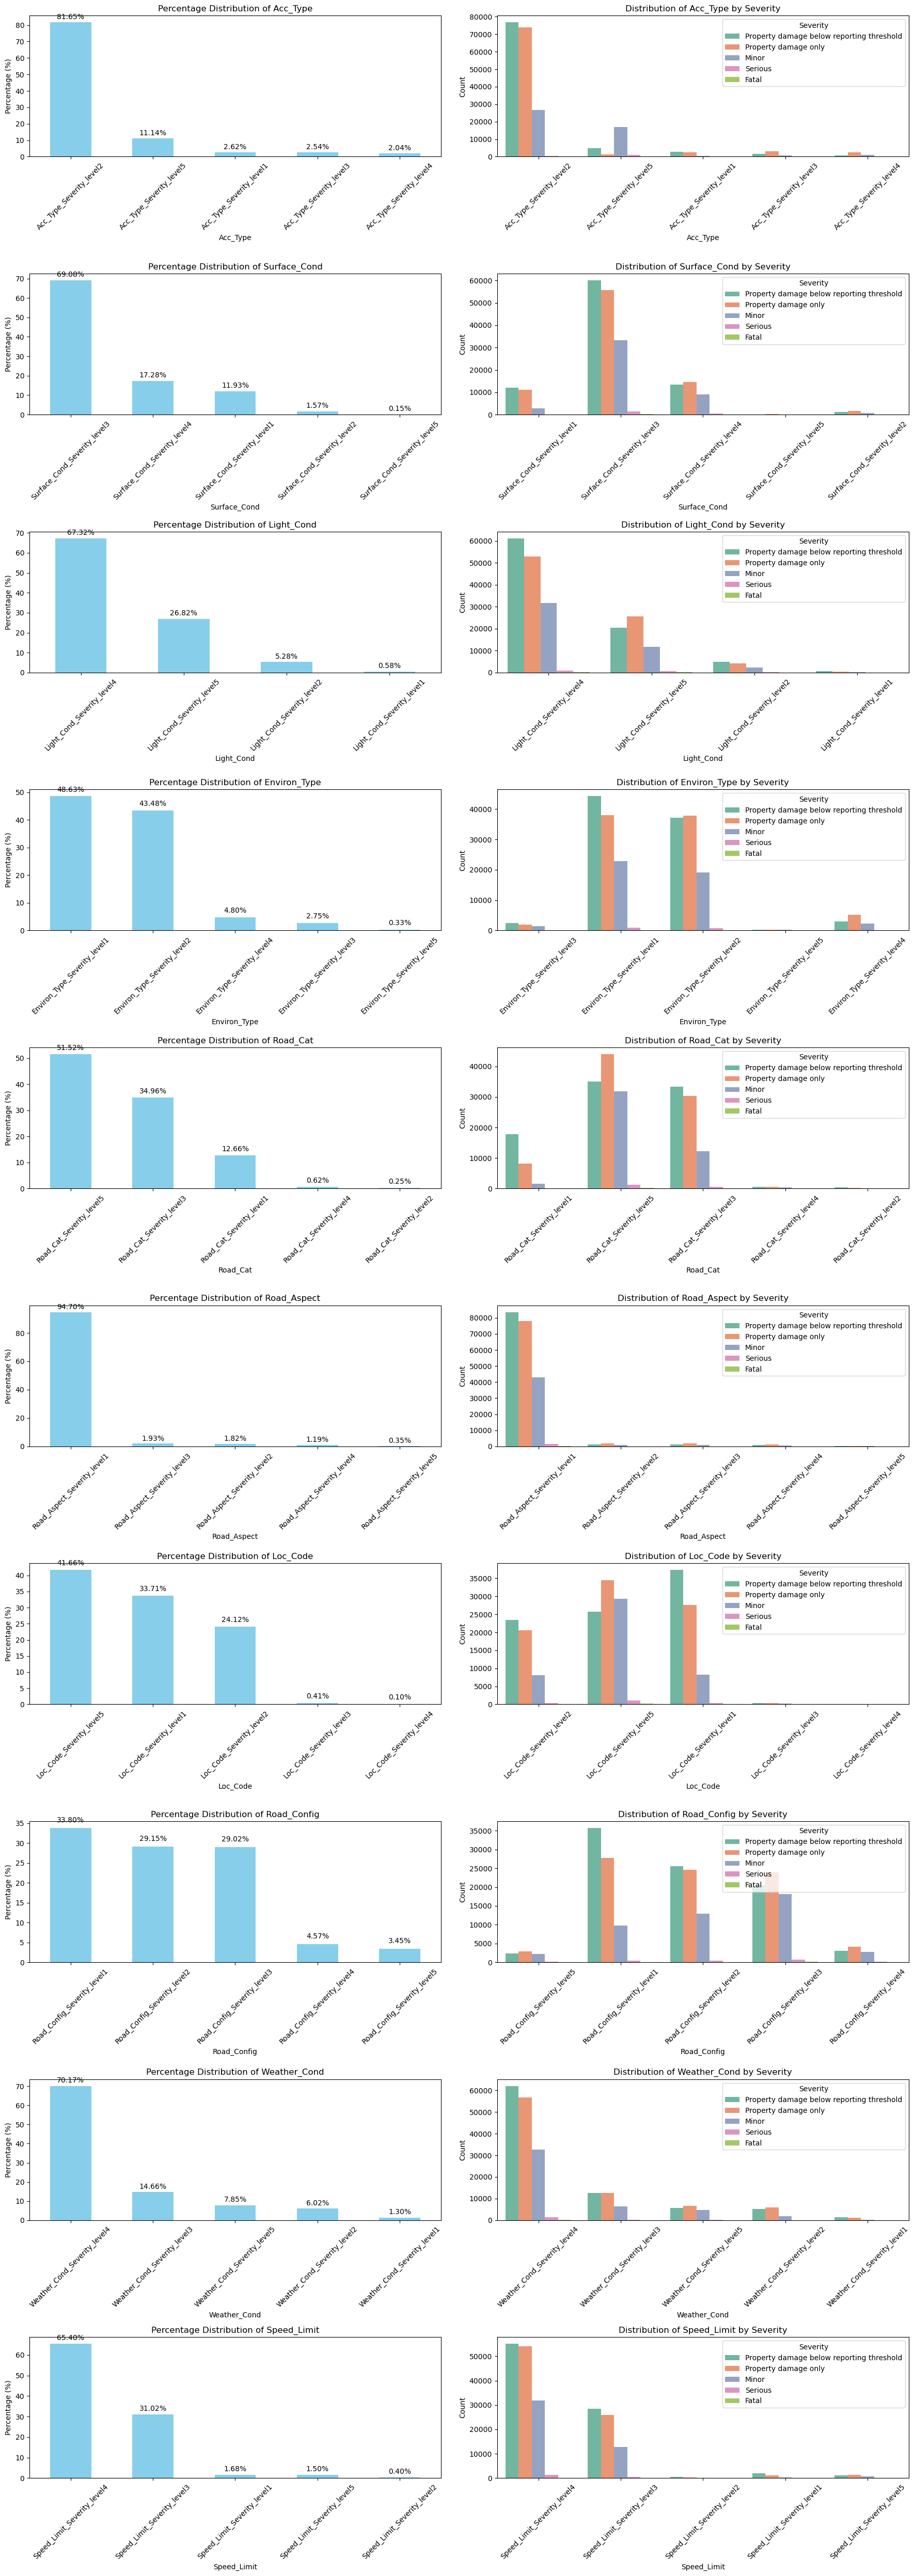

In [28]:
rows = len(Cat_lst)
cols = 2  

plt.figure(figsize=(18, 5 * rows))  

for idx, col in enumerate(Cat_lst):
    plt.subplot(rows, cols, 2*idx + 1)  
    value_counts = binary_df[col].value_counts(normalize=True) * 100
    value_counts.plot(kind='bar', color='skyblue')

    plt.title(f'Percentage Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)

    for i, v in enumerate(value_counts):
        plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)
    
    plt.subplot(rows, cols, 2*idx + 2) 
    sns.countplot(x=col, hue='Severity', data=binary_df, palette='Set2')
    plt.title(f'Distribution of {col} by Severity')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()
plt.show()

(The insight below is from the re-classified levels' meaning. Refer to Appendix table 1)

Critical Road conditions & Infrastructure asscociated with serious/fatal accidences

- Acc_Type (Level 5)
  - Pedestrian collision (32), No collision: rollover (72), Cyclist collision (33), Without collision: rollover (71), Other (99), Without collision: submersion (73), Fixed object: guardrail section (44)
  --> Pedestrian collisions and cyclist collisions show the highest severity scores. Rollover incidents (both with and without prior collision.) Collisions with fixed objects like guardrails and impact attenuators

- Surface_Cond (Level 3, 4)
  - Dried (11), Icy (18)
  - Wet (12), Sand/gravel on road (14)

- Light_Cond (Level 1, 2)
  - Night and illuminated path (3)
  - Day and light (1)

- Environ_Type (Level 3)
  - Business/commercial (3), Other (9), Residential (2)

- Road_Cat (Level 5, 3)
  - Public road: main artery (13), numbered road (12), highway ramp (11)
  - Public road: other (19), residential street (14), Off public roads: private land (22)

- Road_Aspect (Level 1)
  - Straight down slope (13), Straight flat (11)

- Loc_Code (Level 1, 2, 5)
  - Between intersections (34), Other (99), Shopping center (40)
  - Traffic circle (31), Near intersection (33)
  - Intersection (32), Not specified (0), Other bridge/viaduct (37)

- Road_Config (Level 1, 2, 3)
  - One way (1), Other (9)
  - Two directions, one lane per direction (2)
  - Two directions, multiple lanes per direction (3)
  
- Weather_Cond (Level 4)
  - Strong wind (16), Clear (11)

- Speed_Limit (Level 3, 4)
  - 30 km/h, 40 km/h
  - 50 km/h, 90 km/h

Geolocation Quality

/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_31500/3176920429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=binary_df, x='Loc_Quality', ax=axes[0], palette='viridis')
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_31500/3176920429.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=binary_df, x='Loc_Accuracy', ax=axes[1], palette='viridis')
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_31500/3176920429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=binary_df, x='Loc_Imp

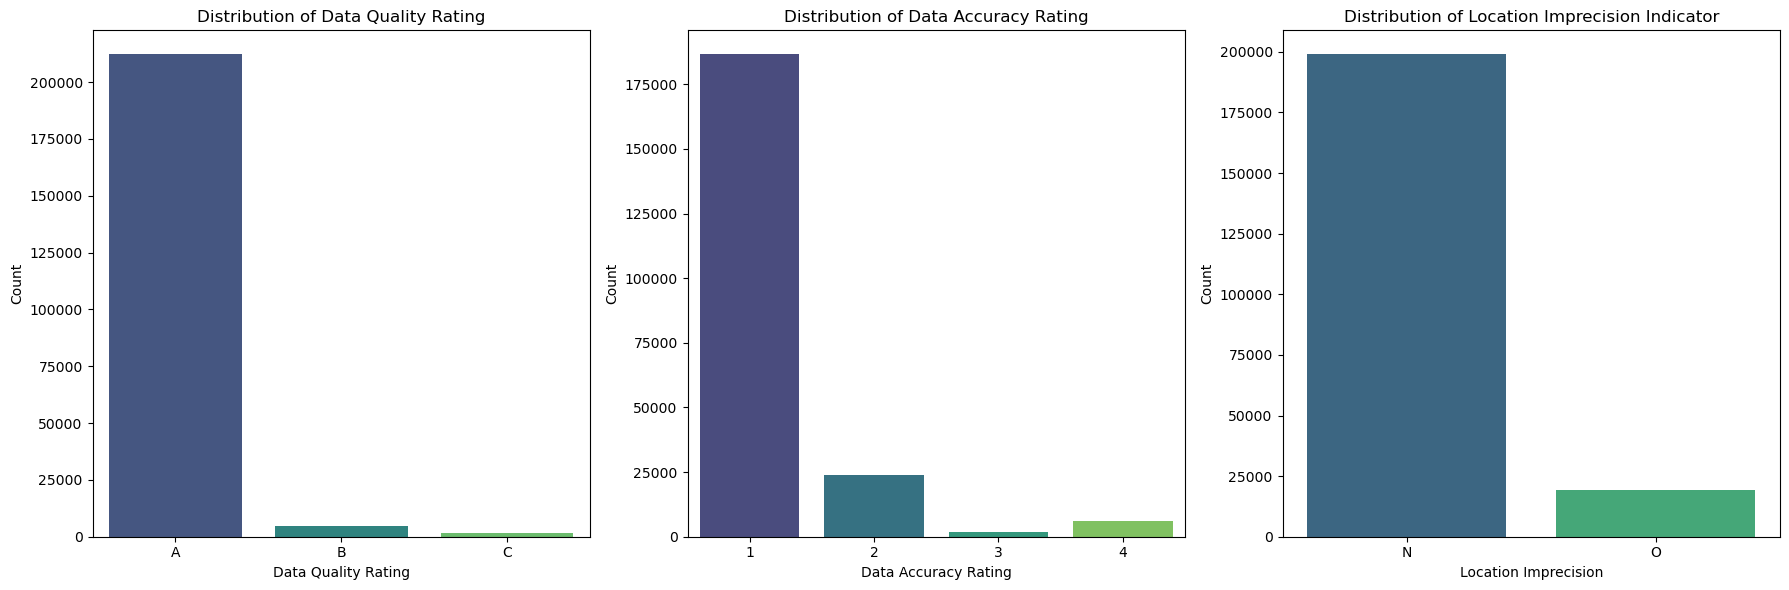

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Data Quality Rating
sns.countplot(data=binary_df, x='Loc_Quality', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Data Quality Rating')
axes[0].set_xlabel('Data Quality Rating')
axes[0].set_ylabel('Count')

# Data Accuracy Rating
sns.countplot(data=binary_df, x='Loc_Accuracy', ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Data Accuracy Rating')
axes[1].set_xlabel('Data Accuracy Rating')
axes[1].set_ylabel('Count')

# Location Imprecision Indicator
sns.countplot(data=binary_df, x='Loc_Imprecise', ax=axes[2], palette='viridis')
axes[2].set_title('Distribution of Location Imprecision Indicator')
axes[2].set_xlabel('Location Imprecision')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

Good news is that most data are reliable combination(A, 1, N).

But there's still some problematic data, and in order to capture those imperfection while also reducing the complexity of model, I converted them into weighted scores to dimentionality purpose. This approach allows us to condense multiple related features into a single, simplify the model without the lost of the underlying information. 

In [30]:
binary_df['Loc_Quality'] = binary_df['Loc_Quality'].map({'A': 3/3, 'B': 2/3, 'C': 1/3})
binary_df['Loc_Accuracy'] = binary_df['Loc_Accuracy'].map({1: 4/4, 2: 3/4, 3: 2/4, 4: 1/4})
binary_df['Loc_Imprecise'] = binary_df['Loc_Imprecise'].map({'O': 1/2, 'N': 1/1})
binary_df["Credibility_Score"] = binary_df['Loc_Quality'] * binary_df['Loc_Accuracy'] * binary_df["Loc_Imprecise"]

binary_df["Credibility_Score"].head()

0    0.500000
1    0.166667
2    0.500000
3    1.000000
4    1.000000
Name: Credibility_Score, dtype: float64

In [31]:
binary_df.drop(columns=["Loc_Quality", "Loc_Accuracy", "Loc_Imprecise"], inplace=True)
binary_df["Credibility_Score"].value_counts()

Credibility_Score
1.000000    171325
0.750000     20152
0.500000     16684
0.166667      4509
0.375000      3803
0.083333      1477
0.250000       178
Name: count, dtype: int64

Credibility_Score to be left-skewed. But this distribution aligns with the real-world meaning of our data, then it’s okay to keep it as is.

Tree-based models (e.g., Decision Trees, RF, XGBoost...) handle skewed data quite well. These models are not affected by skewness since they split data based on conditions and don't rely on assumptions of normality.

We can still use Llinear models, but they are sensitive to skewed data. If we consider using a linear model, we should consider applying transformations (log transformation, Box-Cox, inverse X) to reduce skewness.

##### Numerical data
Lontitude, Latitude, Credibility_Score, Total_Victims, Num_Veh_Invld

/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_31500/2449319953.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=binary_df, palette="Set3", ax=axes[i])
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_31500/2449319953.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=binary_df, palette="Set3", ax=axes[i])
/var/folders/zk/tdbf0qq57717wv6g_psgrjk40000gn/T/ipykernel_31500/2449319953.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=bina

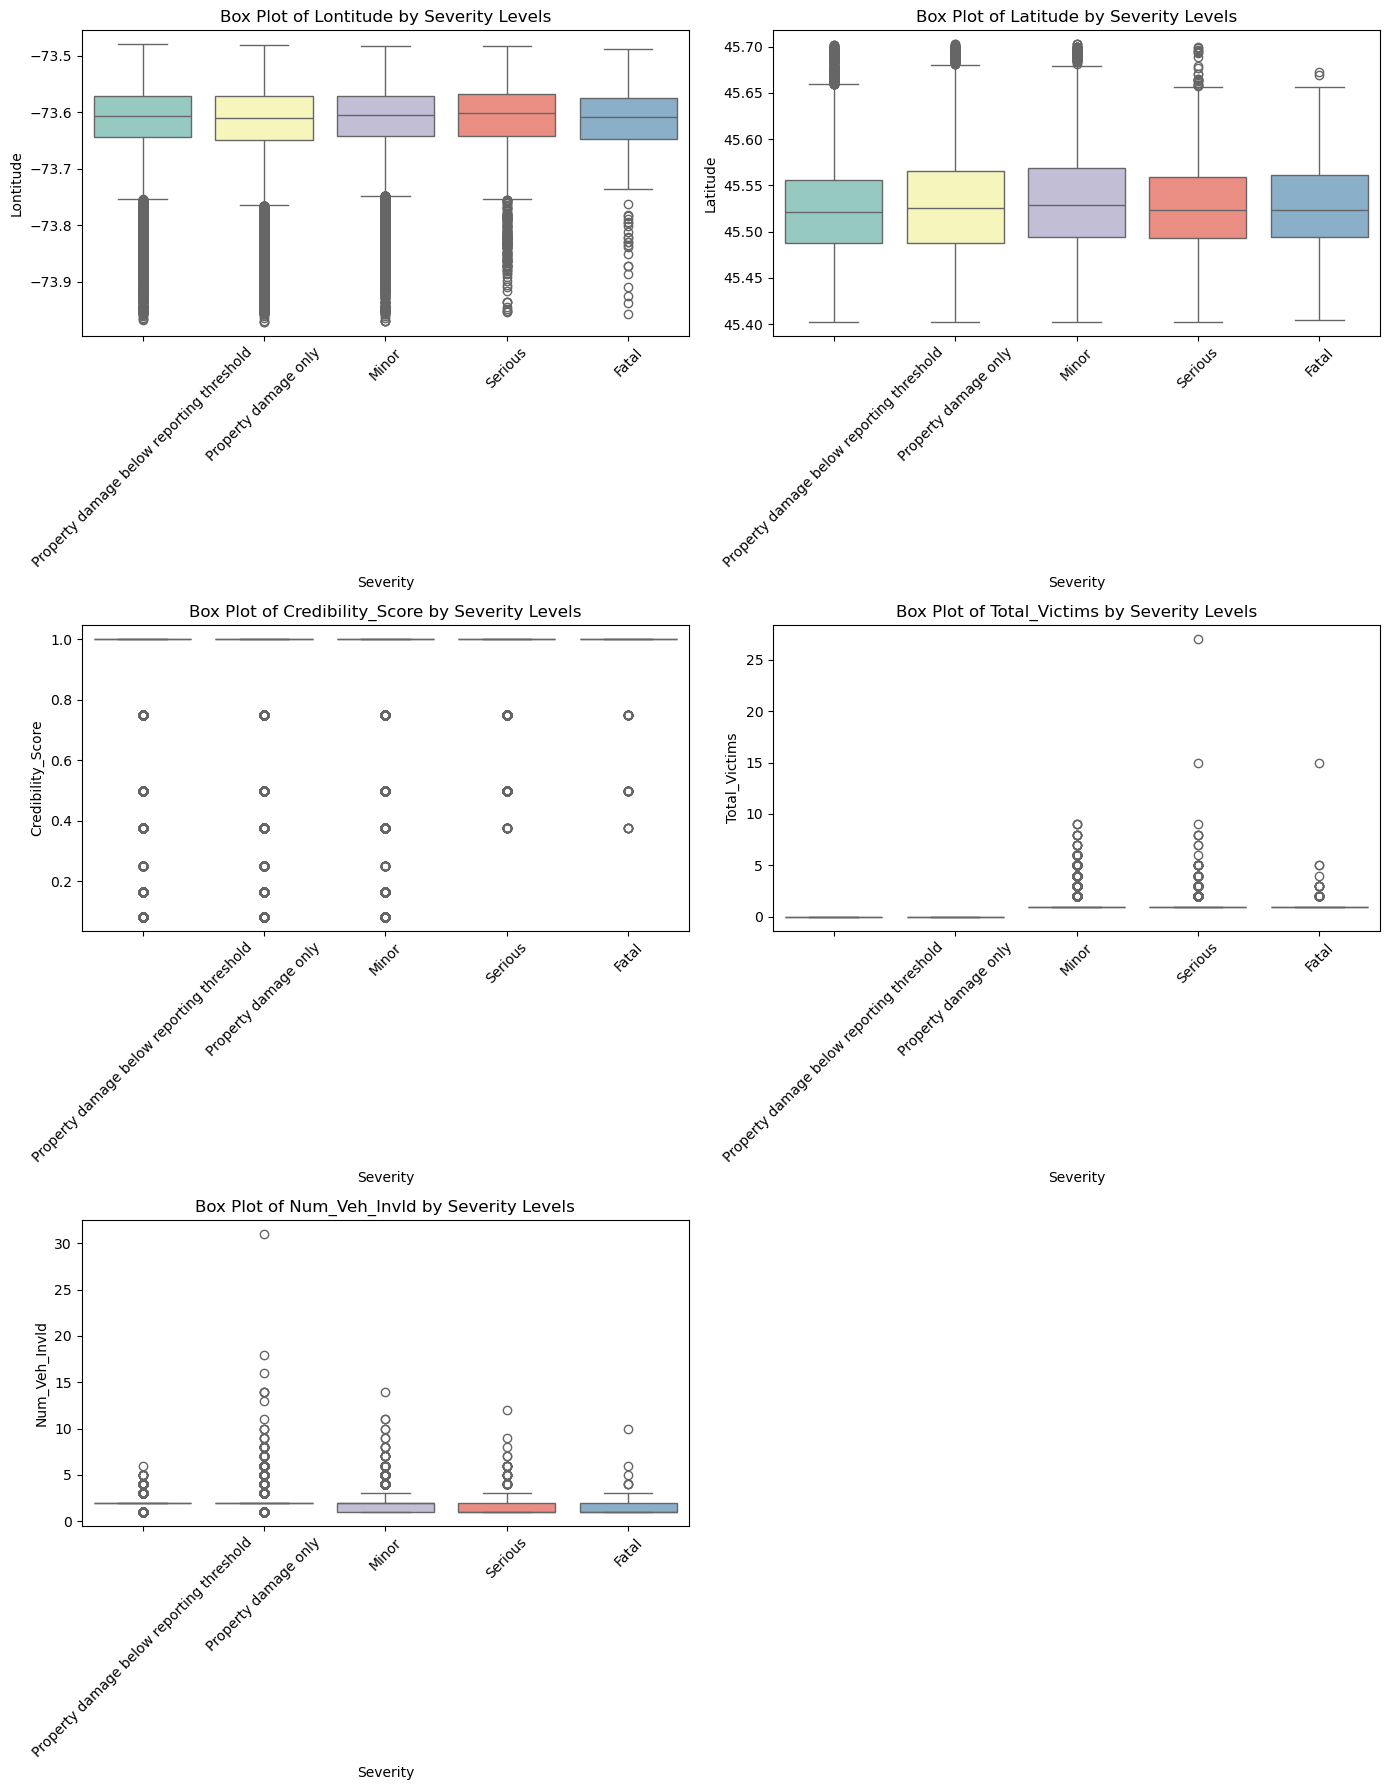

In [32]:
num_cols = ['Lontitude', 'Latitude', 'Credibility_Score', 'Total_Victims', 'Num_Veh_Invld']

n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 6)) 
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x='Severity', y=col, data=binary_df, palette="Set3", ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Severity Levels')
    axes[i].set_xlabel('Severity')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Latitude and Longtitude: It's reasonable there's minimal variation across severity levels, because we only focus on Montreal. 
- Credibility_Score: The distribution is quite similar across all severity levels, since most of the data quality is good.
- Total_Victims: Minor, Serious, Fatal tend to have cases with more victims. Strong positive relationship with severity, more victims generally indicates higher severity. Likely a good predictor. 
- Num_Veh_Invld: Though most accidents across all categories involve 1-5 vehicles, higher severity levels tend to have more cases with multiple vehicles involved. Likely a good predictor. 

##### Summary of the relationship between target and each predictors

Longitude and Latitude:
- Minimal variation in severity across Montreal's focused location.
- Potential for increased predictive value if transformed into location-based categories (e.g., intersections or high-risk zones) when combined with road features.

Credibility_Score:
- No clear relationship with accident severity.
- May serve better as a data quality indicator or weighting factor in analysis to account for data accuracy.

Total_Victims and Num_Veh_Invld:
- Strongest predictors of accident severity.
- Higher counts correlate with increased severity, indicating a direct relationship between the number of victims/vehicles and accident impact.

Critical Road Conditions and Infrastructure:
- Accident Types: Pedestrian and cyclist collisions, rollovers, and collisions with fixed objects (e.g., guardrails) are linked to higher severity.
- Surface Conditions: Icy or gravel-covered roads are associated with severe outcomes, as well as nighttime or illuminated conditions in business/commercial areas.
- Road Categories: Main arteries, numbered roads, and highway ramps show higher severity, likely due to increased speeds and traffic volumes.
- Road Configuration: One-way streets and two-lane, two-directional roads are notably associated with higher severity scores.

Vehicle Types:
- Light vehicles are most commonly involved in accidents and strongly predict serious outcomes.
- Heavy trucks and motorcycles have the highest proportions of severe accidents relative to their counts, indicating elevated risks.
- Bicycles and taxis also show significant serious and fatal outcomes relative to total incidents.

Time-Related Variables:
- Hourly Pattern: Clear peak between 3:00 p.m. and 5:00 p.m., with minor and property damage incidents often occurring during rush hour; serious accidents follow a similar pattern, though fatal accidents lack a consistent daily pattern (suggesting factors like impaired driving).
- Weekly and Monthly Trends: Fridays see increased accidents, likely due to end-of-week traffic flow changes.
- Weekly and Monthly Trends: Peaks in January, February, June, and July due to winter weather and summer travel rates, with a December spike tied to holiday travel.
- Historical Trends: Overall downward trend in accidents since 2013, with a notable drop in 2020 (likely due to pandemic-related factors and improved road safety). Minor fluctuations with slight increases in 2018 and 2019 within the broader trend of reduced accidents.

Potential Kkey predictors from EDA: 

**Acc_Type, Surface_Cond, Light_Cond, Road_Cat, Road_Config, Num_Heavy_Truck, Num_Moto, Num_Bike, Num_Taxi, Num_Veh_Invld, Total_Victims, Speed_Limit, Weather_Cond**

In [ ]:
# binary_df.to_excel("processed_df.xlsx")

### Feature selection
1. Separate method by numerical and categorical predictors
   - Numerical predictors - ANOVA
   - Categorical predictors - Chi-Square test
   - Pearson Correlation MAtrix
2. Combine results using a RF model (feature importance)

##### Correlation between variables

Numerical predictors

Check their relationships with the target variable by using ANOVA F-test.

In [34]:
from scipy.stats import f_oneway

Num_time_cols = ['Year', 'Acc_Time']

New_num_cols = Num_time_cols + num_cols

for col in Num_time_cols:
    binary_df[col] = binary_df[col].astype('int')

binary_df['Severity'] = binary_df['Severity'].astype('category')

for col in New_num_cols:
    groups = [binary_df[binary_df['Severity'] == level][col] for level in binary_df['Severity'].cat.categories]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA for {col}: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA for Year: F-statistic = 772.8234779178508, p-value = 0.0
ANOVA for Acc_Time: F-statistic = 154.02596130943869, p-value = 7.800963306823726e-132
ANOVA for Lontitude: F-statistic = 35.90670884973424, p-value = 4.830834107306805e-30
ANOVA for Latitude: F-statistic = 147.1267964732364, p-value = 7.053481267002212e-126
ANOVA for Credibility_Score: F-statistic = 23.28632794264611, p-value = 2.852632394247448e-19
ANOVA for Total_Victims: F-statistic = 176980.22107702174, p-value = 0.0
ANOVA for Num_Veh_Invld: F-statistic = 1275.8127938373611, p-value = 0.0


Categorical Variables

Chi-Square Test: For each categorical predictor, calculate the Chi-square statistic between the feature and the target variable. Use this because our target is categorical, we need this for testing associations between varibales.

In [35]:
from scipy.stats import chi2_contingency

Cat_time_cols = ['Month', 'Weekday']
binary_cols = [col for col in binary_df.columns if col.startswith('Num')]
New_cat_cols = Cat_lst + Cat_time_cols + binary_cols

for col in New_cat_cols:
    binary_df[col] = binary_df[col].astype('category')

for col in New_cat_cols:
    contingency_table = pd.crosstab(binary_df[col], binary_df['Severity'])
    
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-Square test for {col} and {'Severity'}:")
    print(f"Chi2-statistic = {chi2_stat}, p-value = {p_val}, Degrees of Freedom = {dof}")
    print("\n")

Chi-Square test for Acc_Type and Severity:
Chi2-statistic = 47584.117099284485, p-value = 0.0, Degrees of Freedom = 16


Chi-Square test for Surface_Cond and Severity:
Chi2-statistic = 2405.5493745537433, p-value = 0.0, Degrees of Freedom = 16


Chi-Square test for Light_Cond and Severity:
Chi2-statistic = 1375.11175425184, p-value = 3.227011049865598e-287, Degrees of Freedom = 12


Chi-Square test for Environ_Type and Severity:
Chi2-statistic = 1165.3293917722751, p-value = 4.099002092017347e-238, Degrees of Freedom = 16


Chi-Square test for Road_Cat and Severity:
Chi2-statistic = 14495.644282556343, p-value = 0.0, Degrees of Freedom = 16


Chi-Square test for Road_Aspect and Severity:
Chi2-statistic = 692.0520429535441, p-value = 6.353140973000376e-137, Degrees of Freedom = 16


Chi-Square test for Loc_Code and Severity:
Chi2-statistic = 15492.099356113144, p-value = 0.0, Degrees of Freedom = 16


Chi-Square test for Road_Config and Severity:
Chi2-statistic = 7321.496098485598, p-va

Except for Num_OffRoad, Num_Snowmobile, all numerical and categorical variables show significant relationships with the target. Should drop them!!

##### Feature selection model

Excluding Seq_Num, Street, Near_To:

- Since Seq_Num is simply an identifier with no predictive value, it’s best excluded.
- Both Street and Near_To may contain too many unique levels, which can result in sparse data and may not generalize well in a model. Also, these location-based columns are redundant if Latitude and Longitude variables are already in the dataset.

And Num_OffRoad, Num_Snowmobile

In [38]:
binary_df.drop(columns=["Seq_Num", "Street", "Near_To", "Num_OffRoad", "Num_Snowmobile"], inplace=True)
binary_df.columns

Index(['Acc_Date', 'Acc_Time', 'Acc_Type', 'Environ_Type', 'Latitude',
       'Light_Cond', 'Loc_Code', 'Lontitude', 'Month', 'Num_Bike', 'Num_Bus',
       'Num_Emerg', 'Num_Equip', 'Num_Heavy_Truck', 'Num_Light_Veh',
       'Num_Moped', 'Num_Moto', 'Num_Other_Veh', 'Num_Taxi', 'Num_Unspec_Veh',
       'Road_Aspect', 'Road_Cat', 'Road_Config', 'Severity', 'Speed_Limit',
       'Surface_Cond', 'Weather_Cond', 'Weekday', 'Year', 'Num_Veh_Invld',
       'Total_Victims', 'Credibility_Score'],
      dtype='object')

Encode categorical variables

In [265]:
binary_cols = [col for col in binary_df.columns if col.startswith('Num')]
for col in binary_cols:
    binary_df[col] = binary_df[col].astype('bool')

dummy_cols = Cat_time_cols + Cat_lst
binary_df_encoded = pd.get_dummies(binary_df, columns=dummy_cols, drop_first=True)
binary_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218128 entries, 0 to 218127
Data columns (total 76 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Acc_Date                                   218128 non-null  datetime64[ns]
 1   Acc_Time                                   218128 non-null  int64         
 2   Latitude                                   218128 non-null  float64       
 3   Lontitude                                  218128 non-null  float64       
 4   Num_Bike                                   218128 non-null  bool          
 5   Num_Bus                                    218128 non-null  bool          
 6   Num_Emerg                                  218128 non-null  bool          
 7   Num_Equip                                  218128 non-null  bool          
 8   Num_Heavy_Truck                            218128 non-null  bool          
 9   Num_

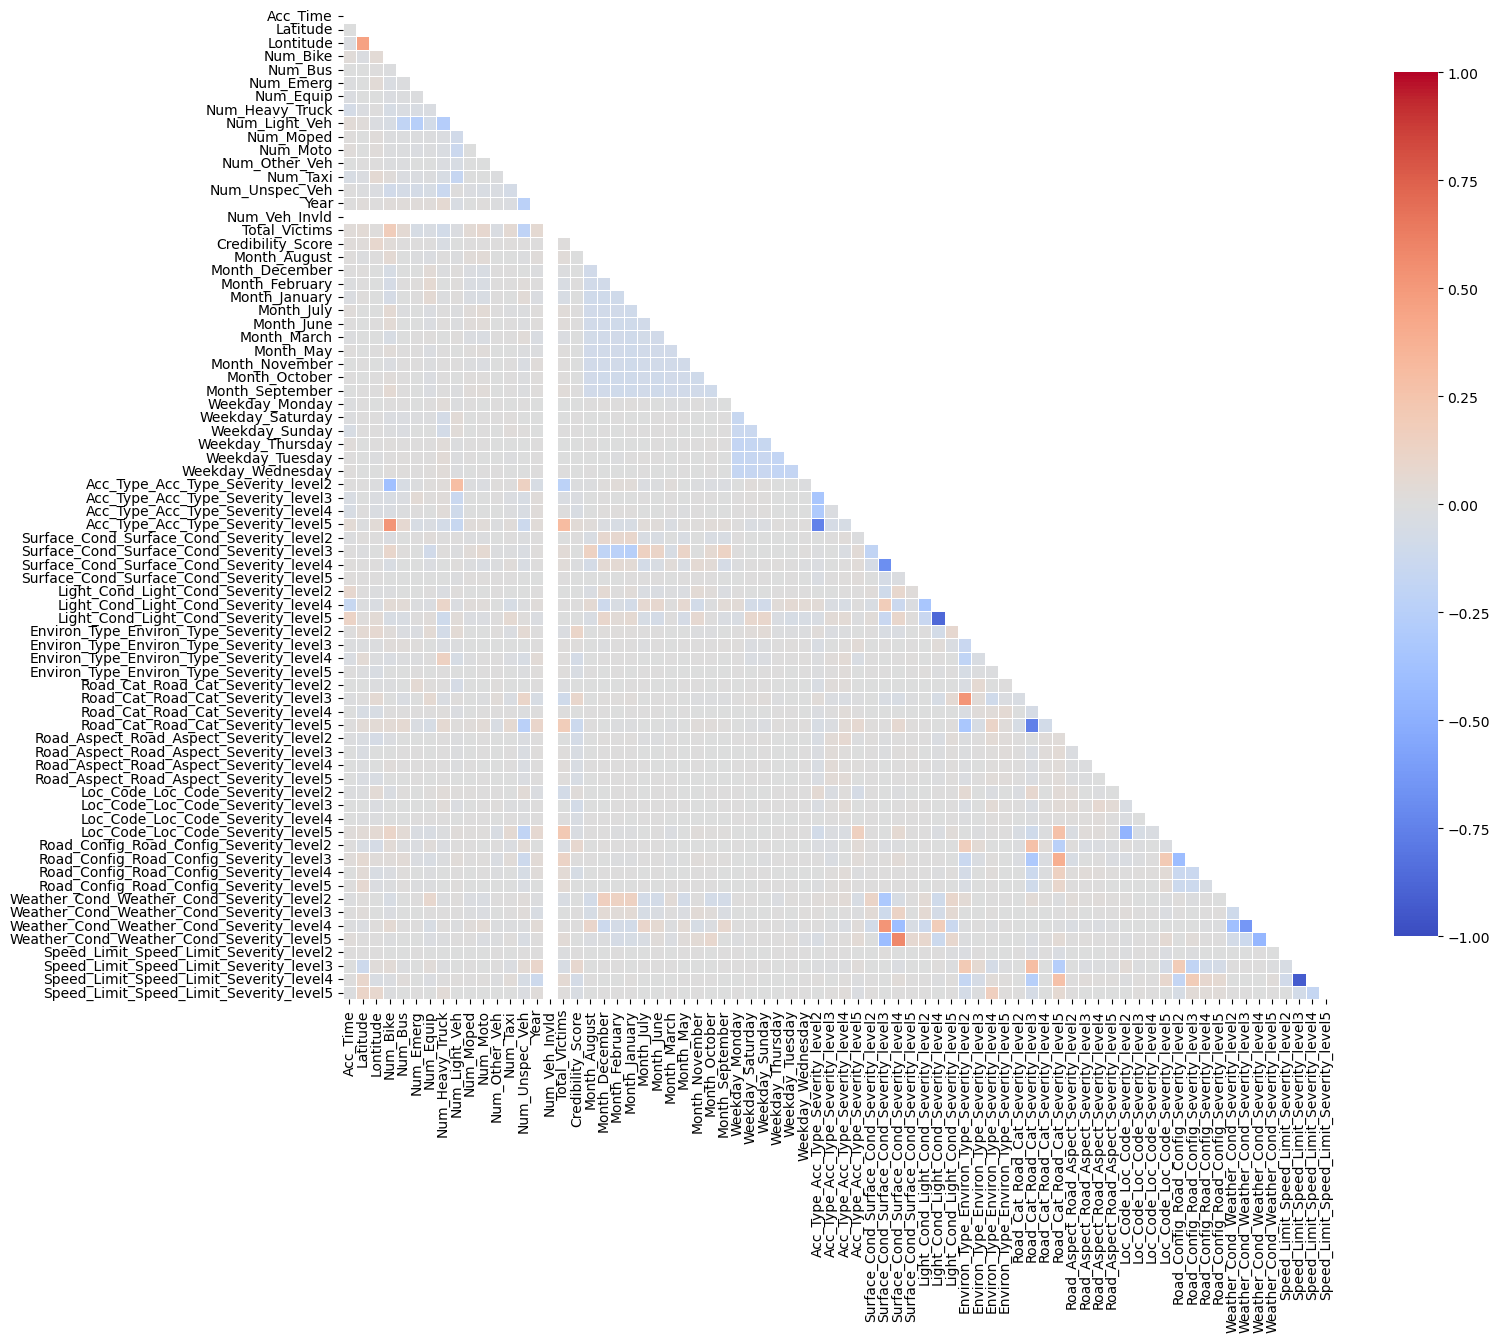

In [266]:
binary_df_encoded_numeric = binary_df_encoded.drop(["Severity", "Acc_Date"], axis=1)
corr_matrix = binary_df_encoded_numeric.corr(method='pearson')

plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,
            cmap='coolwarm',
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            square=True,
            xticklabels=corr_matrix.columns, 
            yticklabels=corr_matrix.columns,
            vmin=-1, vmax=1,
            center=0) 

plt.tight_layout()
plt.show()

Overall, our varibales are uncorrelated.

In [ ]:
# binary_df_encoded.to_excel("dummified&processed_df.xlsx")

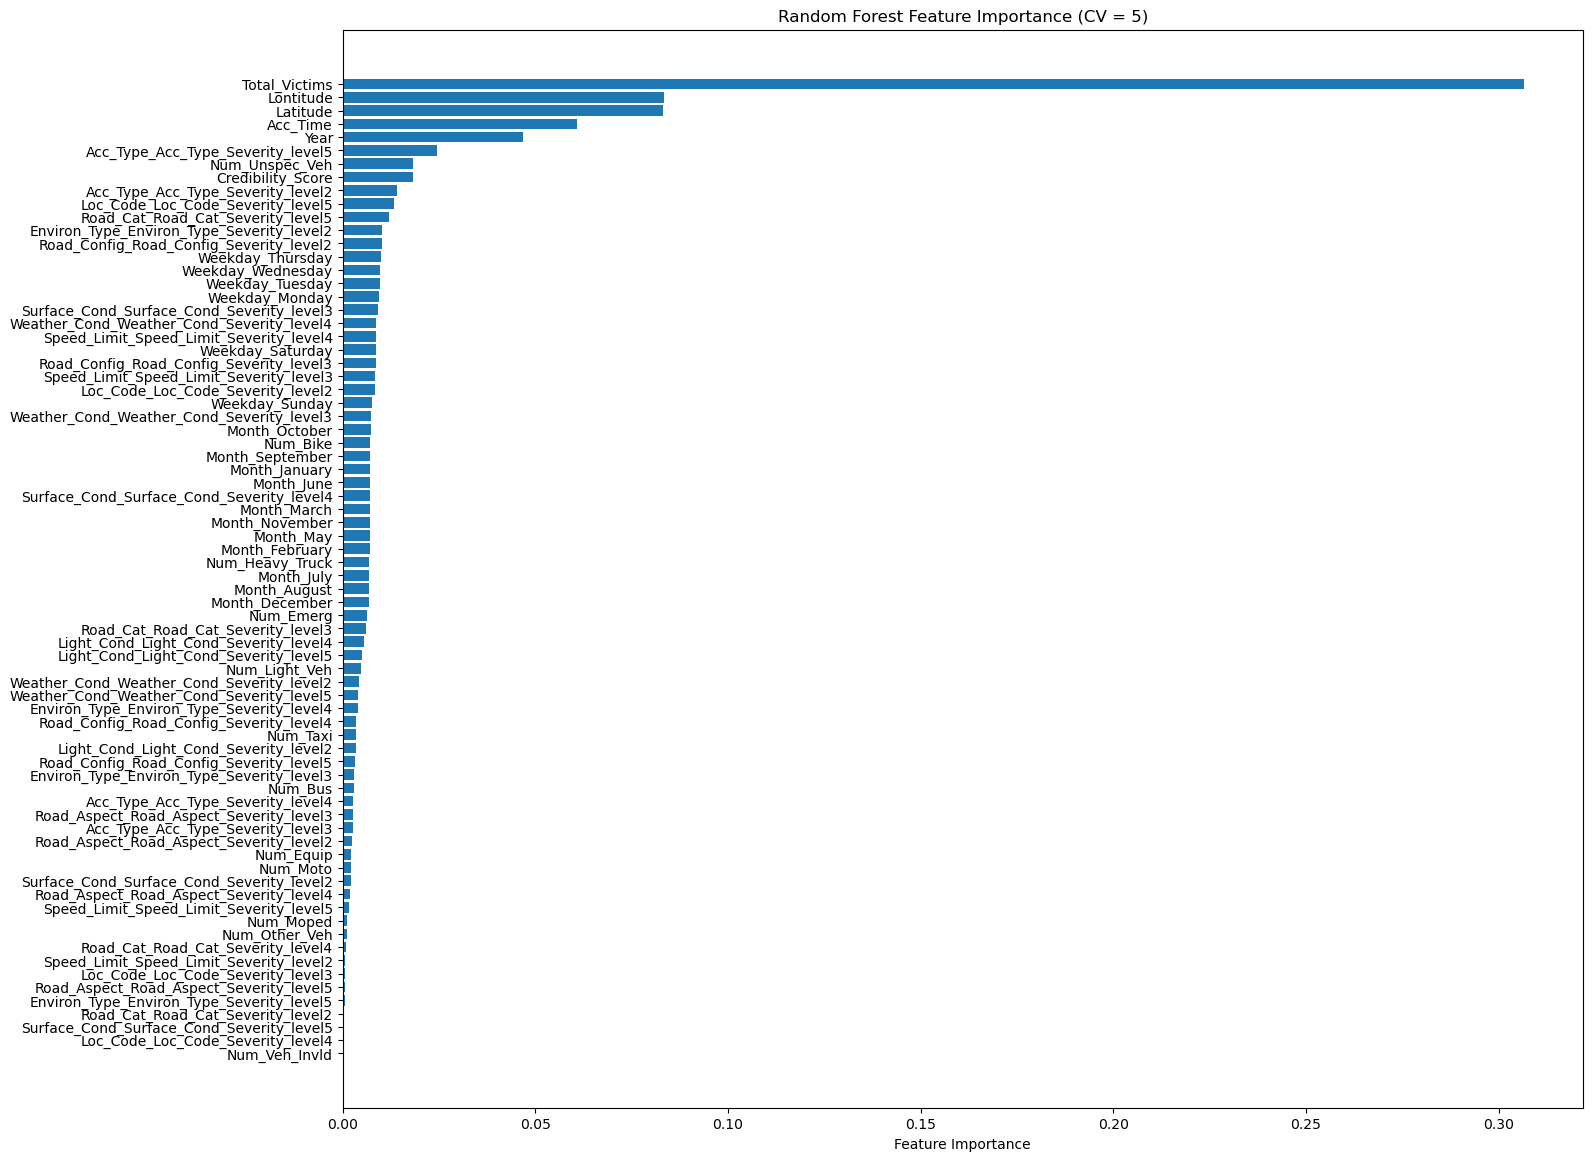

In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

binary_df_encoded_fs = binary_df_encoded.drop(["Acc_Date"], axis=1)

X = binary_df_encoded_fs.drop(columns=['Severity'])
y = binary_df_encoded_fs['Severity']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

importances = np.zeros(X.shape[1])

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, y_train) 
    importances += rf.feature_importances_ 

# normalization
importances /= cv.get_n_splits()


# visualization
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(16, 14))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (CV = 5)')
plt.gca().invert_yaxis()
plt.show()

top_n = 30
selected_features = feature_importances_df.head(top_n)['feature'].tolist()
X_selected = X[selected_features]

From the Random Forest (RF) analysis, we've identified another set of important variables that significantly influence the target outcome: 

Total_Victims, Longitude, Latitude, Year, Acc_Time, Acc_Type, Num_Unspec_Veh, Credibility_Score......

(ReCall from EDA, we've found some important varibales: Acc_Type, Surface_Cond, Light_Cond, Road_Cat, Road_Config, Num_Heavy_Truck, Num_Moto, Num_Bike, Num_Taxi, Num_Veh_Invld, Total_Victims, Speed_Limit, Weather_Cond)

**These variables appear in two waves of importance (RF feature selection + EDA findings) strongly suggests their critical role in influencing the outcome, which means it's recommended to including these variables in modeling part.**

### Modelling

Some ideas of interaction terms that could be considered in building models:

- Between different vehicle types
- Between vehicle counts and geographic features